<a href="https://colab.research.google.com/github/julianamu323/WF/blob/main/Estudio_de_complejos_QRS_mediante_Wavelets_y_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análisis con Wavelets y Fourier (Ejemplo práctico).**

In [ ]:
# Instalando el paquete de wavelets.

!pip install pywavelets

In [ ]:
# Invocando los paquetes necesarios para el desarrollo del ejercicio.

import pywt
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal    # Generar ruido en la señal.

In [ ]:
from scipy.fft import fft, ifft

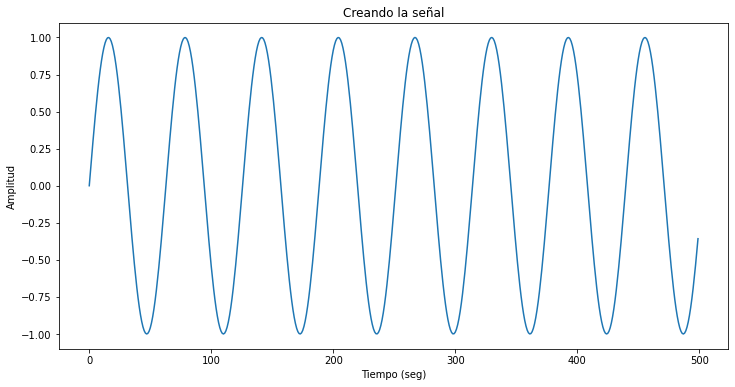

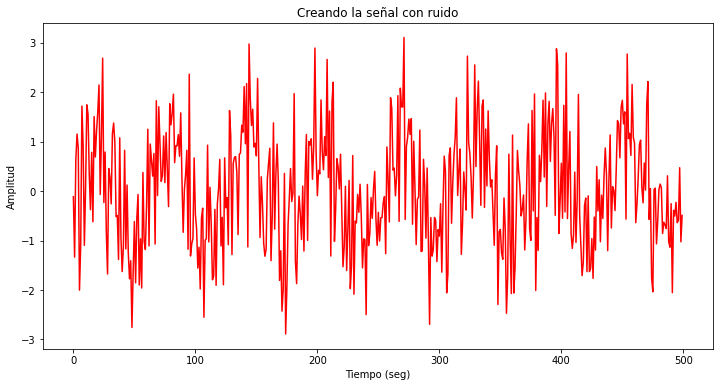

In [ ]:
# Creando la señal.
x = np.sin(np.arange(0,50,.1))
plt.figure(figsize=(12,6))
plt.plot(x)
plt.title("Creando la señal")
plt.xlabel("Tiempo (seg)")
plt.ylabel("Amplitud")
plt.show()

# Generando el ruido.
ruido = np.random.normal(0,1,len(x))    #Generando ruido Gaussiano.

# Señal con ruido.
sr = x+ruido 

plt.figure(figsize=(12,6))
plt.plot(sr, color="red")
plt.title("Creando la señal con ruido")
plt.xlabel("Tiempo (seg)")
plt.ylabel("Amplitud")
plt.show()


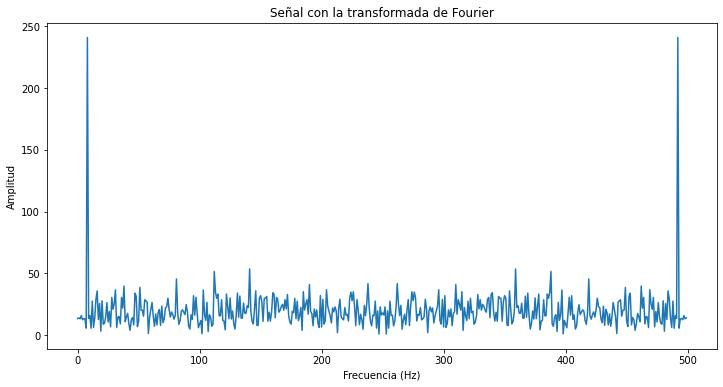

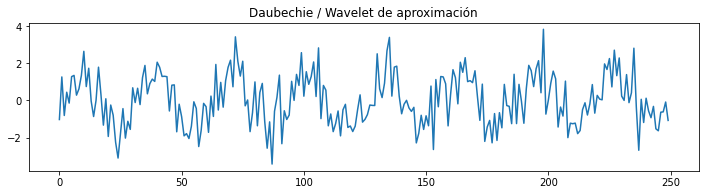

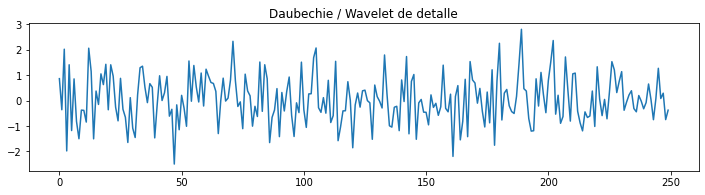

In [ ]:
# Transformada de Fourier.
a=np.abs(fft(sr))
plt.figure(figsize=(12,6))
plt.plot(a)
plt.title("Señal con la transformada de Fourier")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.show()

# Obtener la wavelet.
cA, cD = pywt.dwt(sr, 'db1')
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
plt.title("Daubechie / Wavelet de aproximación")
plt.plot(cA)     # Calculando la aproximación

plt.figure(figsize=(12,6))
plt.subplot(2,1,1)
plt.title("Daubechie / Wavelet de detalle")
plt.plot(cD)     # Calculando el detalle

plt.show()

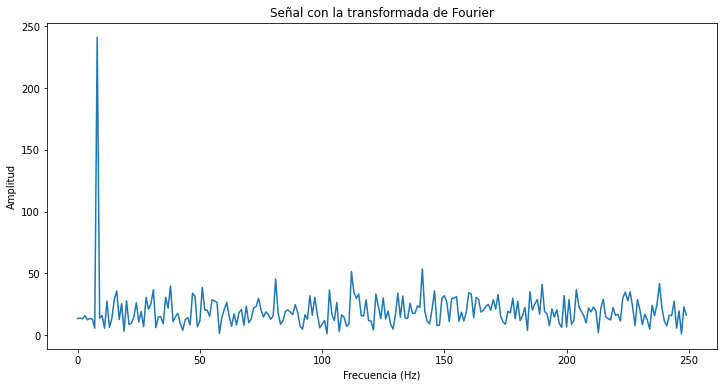

In [ ]:
# Transformada de Fourier.
a=np.abs(fft(sr))
plt.figure(figsize=(12,6))
plt.plot(a[:250])
plt.title("Señal con la transformada de Fourier")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.show()

In [ ]:
busqueda=np.where(np.abs(a)>60)
busqueda

(array([  8, 492]),)

In [ ]:
print(np.abs(a[8]))

241.01031673534575


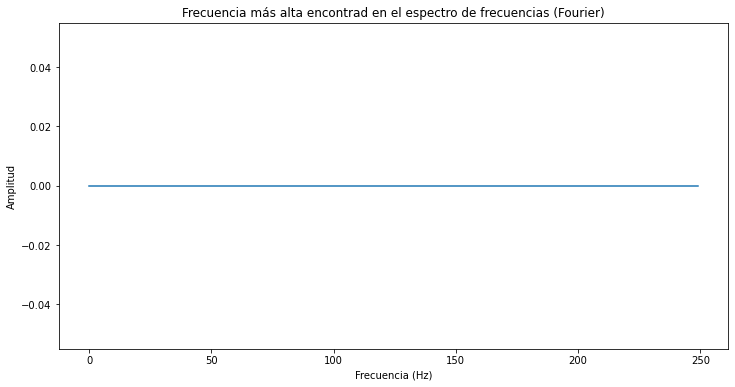

In [ ]:
for n in range(len(a)):
  if np.abs(a[n]) < 244.6352708816888:
    a[n] = 0

plt.figure(figsize=(12,6))
plt.plot(np.abs(a)[:250])
plt.title('Frecuencia más alta encontrad en el espectro de frecuencias (Fourier)')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


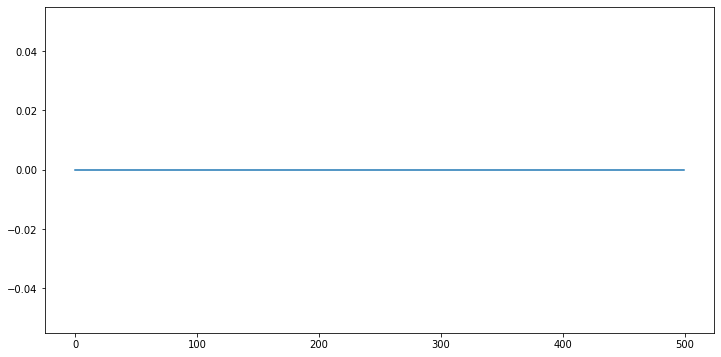

In [ ]:
b=ifft(a)

plt.figure(figsize=(12,6))
plt.plot(b)
plt.show()

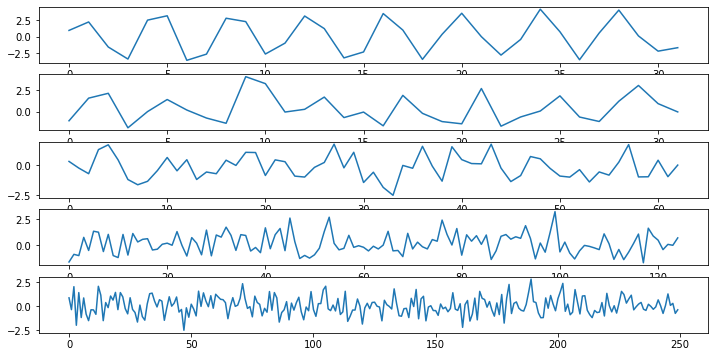

In [ ]:
# Obtener la wavelet.
cA, cD1, cD2, cD3, cD4 = pywt.wavedec(sr, 'db1', level = 4)
plt.figure(figsize=(12,6))
plt.subplot(5,1,1), plt.plot(cA)
plt.subplot(5,1,2), plt.plot(cD1)
plt.subplot(5,1,3), plt.plot(cD2)
plt.subplot(5,1,4), plt.plot(cD3)
plt.subplot(5,1,5), plt.plot(cD4)

plt.show()

# **Daubechies vs Fourier**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt 
import scipy, matplotlib 
from scipy.fft import fft, fftfreq, ifft

In [ ]:
pywt.families()

['haar',
 'db',
 'sym',
 'coif',
 'bior',
 'rbio',
 'dmey',
 'gaus',
 'mexh',
 'morl',
 'cgau',
 'shan',
 'fbsp',
 'cmor']

## **Ejemplo 1.**

[]

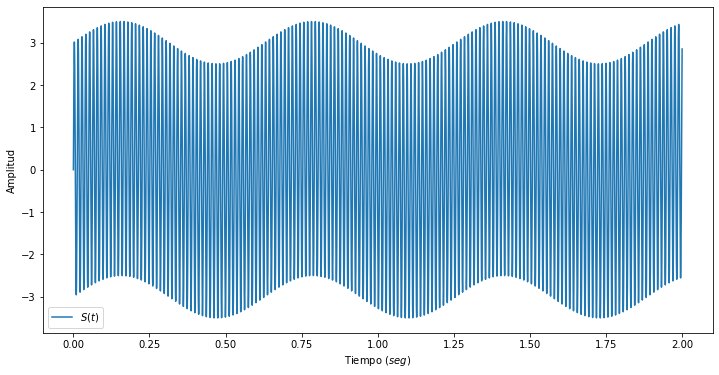

In [ ]:
fs=0.0001
L=2
t=np.arange(0,L,fs)
S=3*np.sin(500*t)+0.5*np.sin(10*t)

plt.figure(figsize=(12,6))
plt.plot(t,S, label='$S(t)$')
plt.xlabel('Tiempo ($seg$)')
plt.ylabel('Amplitud')
plt.legend()
plt.plot()


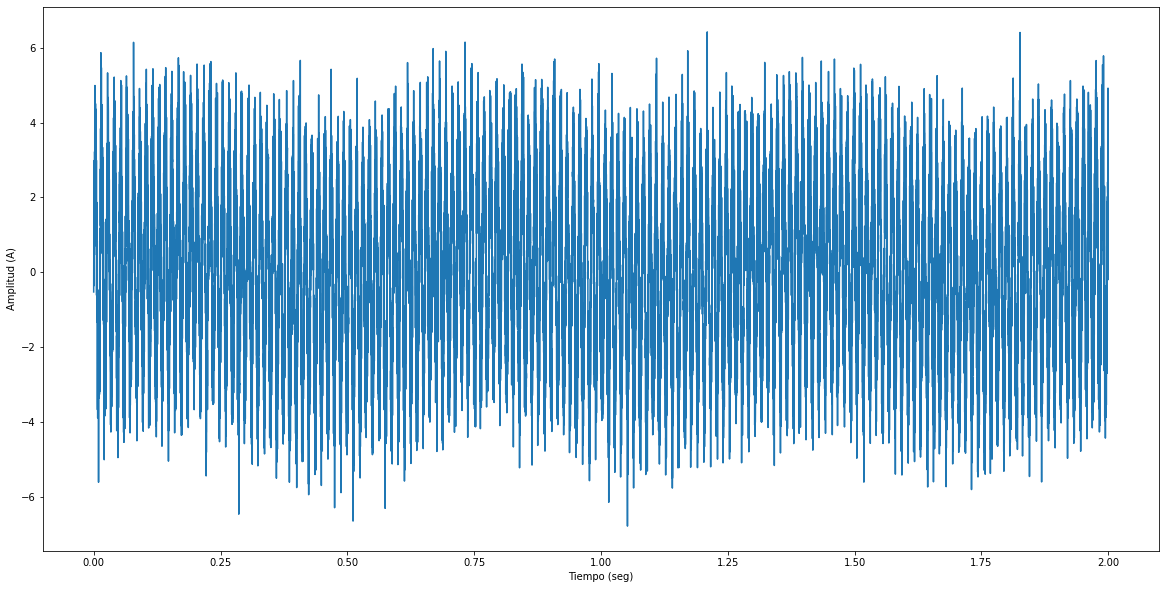

In [ ]:
ruido = np.random.normal(0,1,len(S))
señal = S + ruido

plt.figure(figsize=(20,10))
plt.plot(t, señal)
plt.xlabel("Tiempo (seg)")
plt.ylabel("Amplitud (A)")
plt.show()

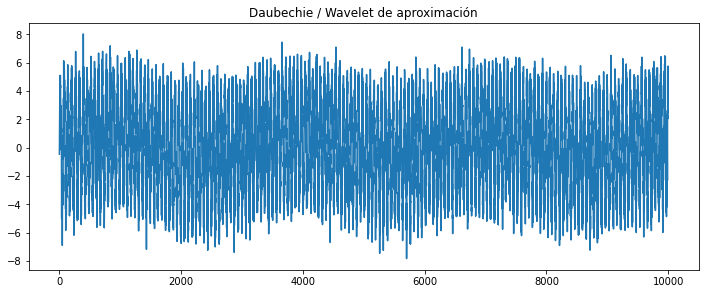

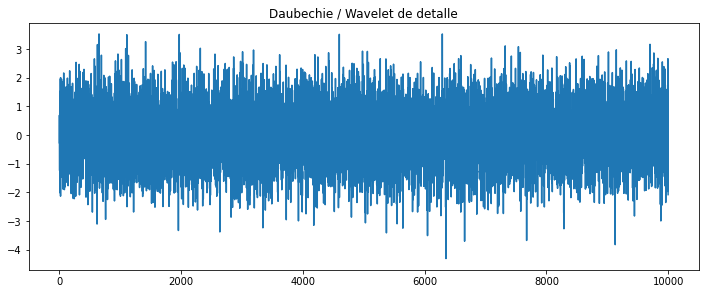

In [ ]:
cA, cD = pywt.dwt(señal, 'db1')
plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
plt.title("Daubechie / Wavelet de aproximación")
plt.plot(cA)     # Calculando la aproximación

plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.title("Daubechie / Wavelet de detalle")
plt.plot(cD)     # Calculando el detalle

plt.show()

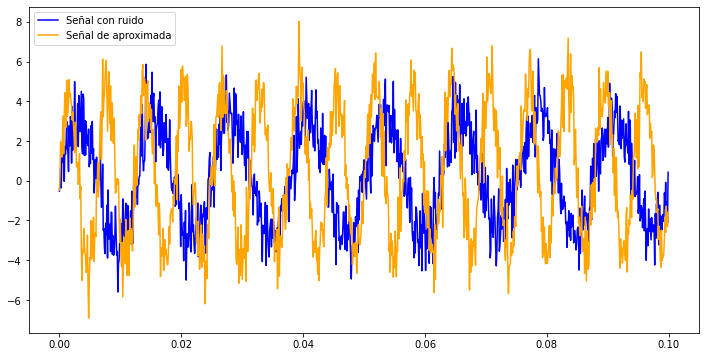

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(t[:1000], señal[:1000], color='blue', label='Señal con ruido')
plt.plot(t[:1000],cA[:1000], color='orange', label='Señal de aproximada')
plt.legend()
plt.show()

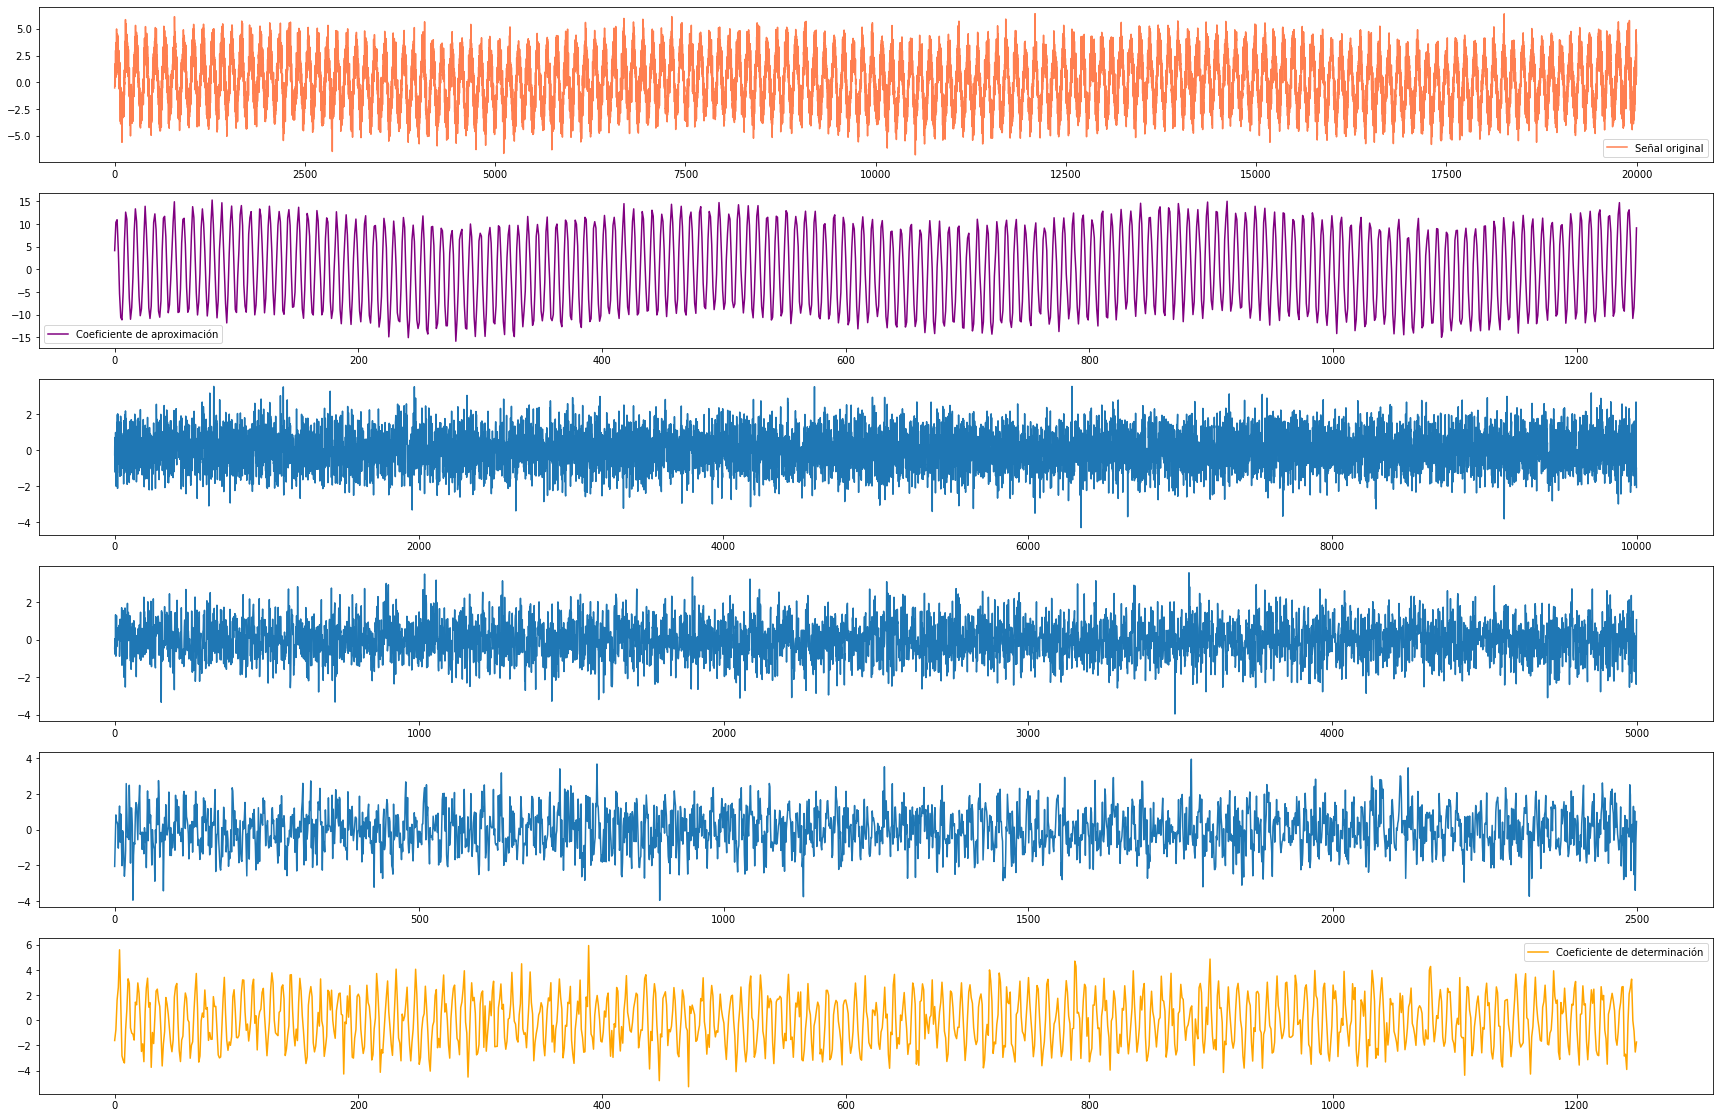

In [ ]:
cA, cD1, cD2, cD3, cD4 = pywt.wavedec(señal, 'db1', level = 4)
plt.figure(figsize=(30,20))
plt.subplot(6,1,1), plt.plot(señal, color= 'coral', label='Señal original')
plt.legend()
plt.subplot(6,1,2), plt.plot(cA, color='purple', label='Coeficiente de aproximación')
plt.legend()
plt.subplot(6,1,3), plt.plot(cD4)
plt.subplot(6,1,4), plt.plot(cD3)
plt.subplot(6,1,5), plt.plot(cD2)
plt.subplot(6,1,6), plt.plot(cD1, color='orange', label='Coeficiente de determinación')
plt.legend()

plt.show()

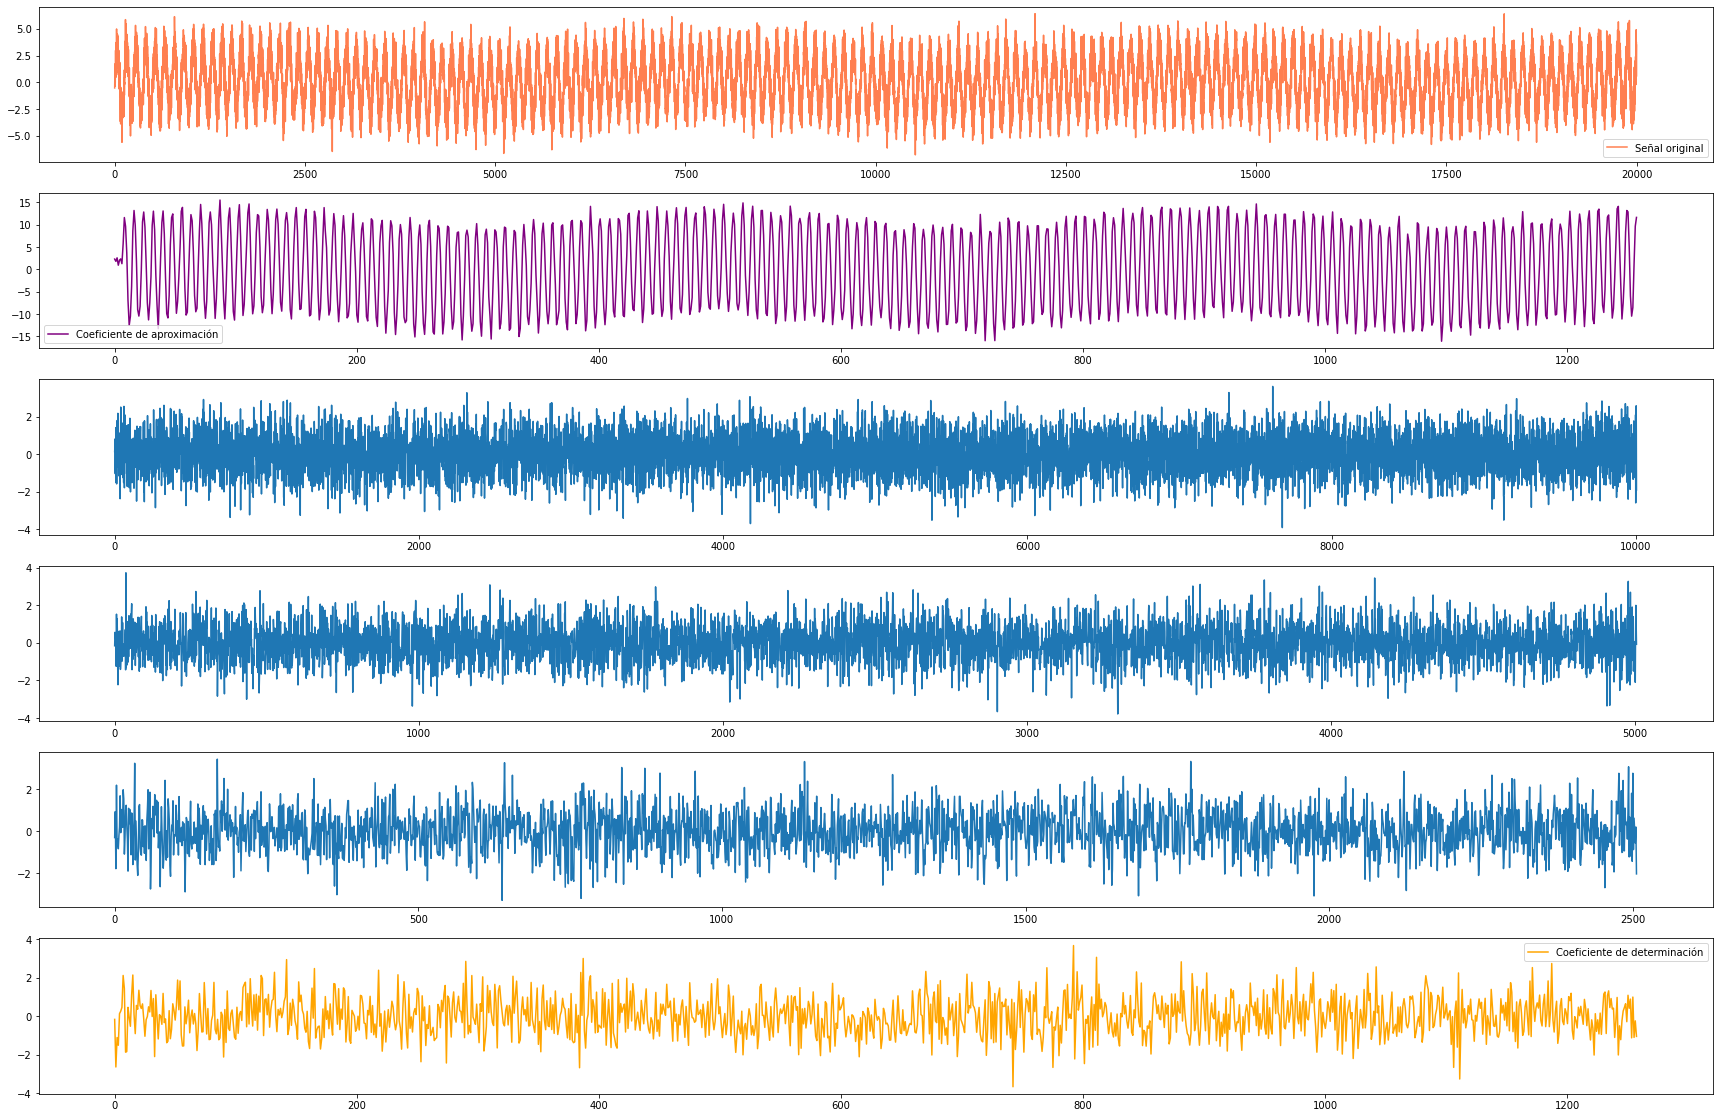

In [ ]:
c1A, cD11, cD12, cD13, cD14 = pywt.wavedec(señal, 'db5', level = 4)
plt.figure(figsize=(30,20))
plt.subplot(6,1,1), plt.plot(señal, color= 'coral', label='Señal original')
plt.legend()
plt.subplot(6,1,2), plt.plot(c1A, color='purple', label='Coeficiente de aproximación')
plt.legend()
plt.subplot(6,1,3), plt.plot(cD14)
plt.subplot(6,1,4), plt.plot(cD13)
plt.subplot(6,1,5), plt.plot(cD12)
plt.subplot(6,1,6), plt.plot(cD11, color='orange', label='Coeficiente de determinación')
plt.legend()
plt.show()

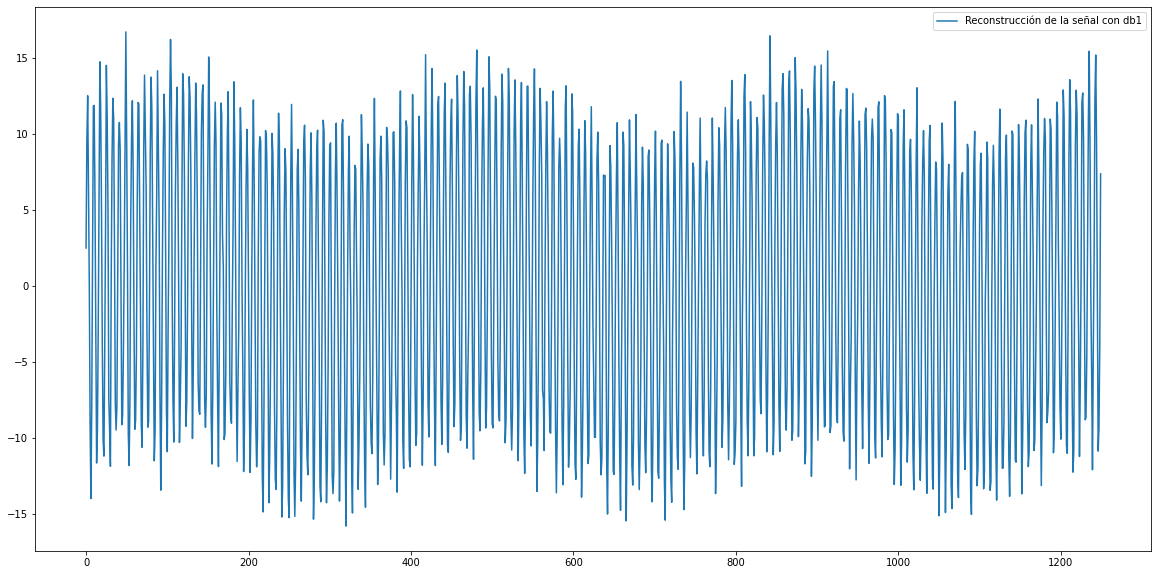

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(cA+cD1, label='Reconstrucción de la señal con db1')
plt.legend()
plt.show()

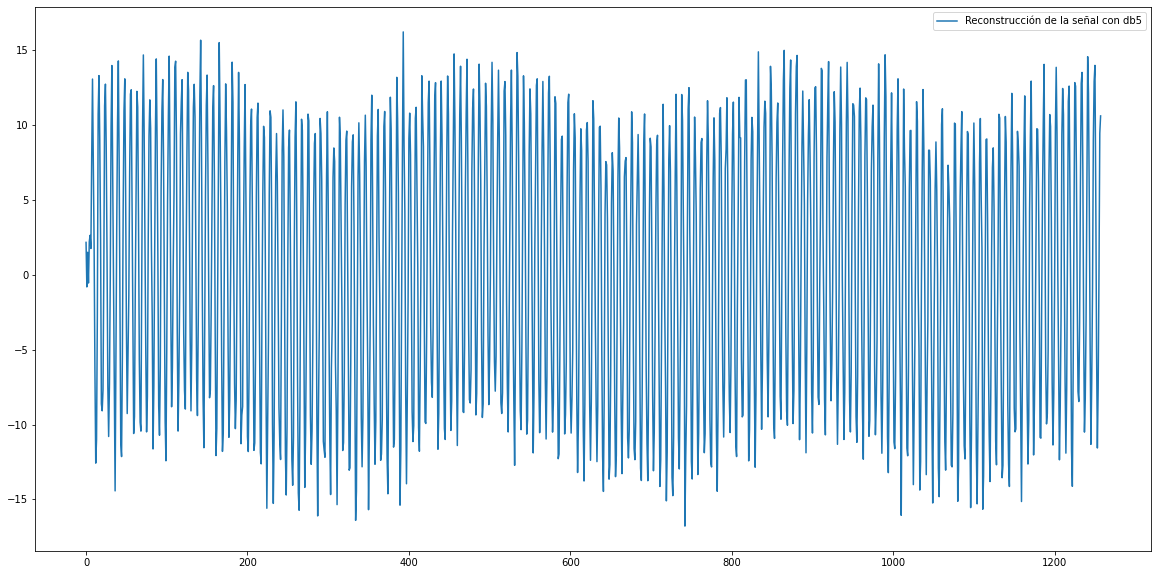

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(c1A+cD11, label='Reconstrucción de la señal con db5')
plt.legend()
plt.show()

## **Ejemplo 2.**

$$f(t)=sen(20e^{-2t})$$

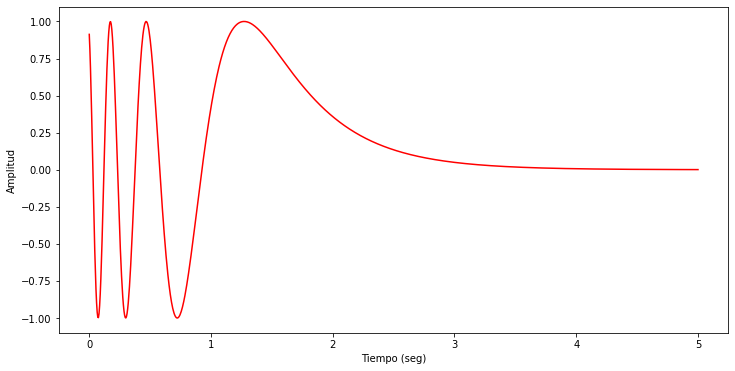

In [ ]:
t1 = np.linspace(0,5, 1000)
X = np.sin(20*np.exp(-2*t1))

plt.figure(figsize=(12,6))
plt.plot(t1, X, color='red')
plt.xlabel('Tiempo (seg)')
plt.ylabel('Amplitud')
plt.show()

### **Wavelet (Daubechies.)**

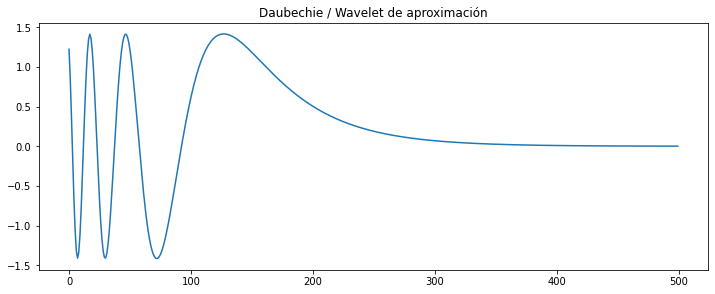

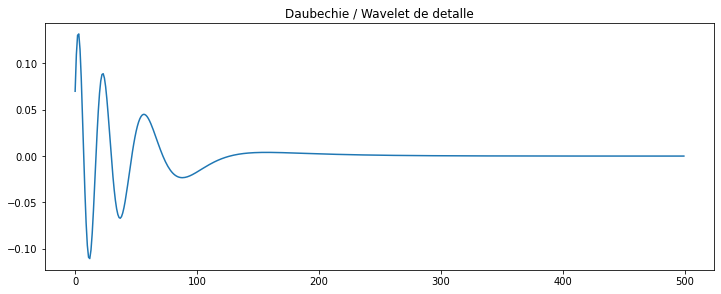

In [ ]:
cA, cD = pywt.dwt(X, 'db1')
plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
plt.title("Daubechie / Wavelet de aproximación")
plt.plot(cA)     # Calculando la aproximación

plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.title("Daubechie / Wavelet de detalle")
plt.plot(cD)     # Calculando el detalle

plt.show()

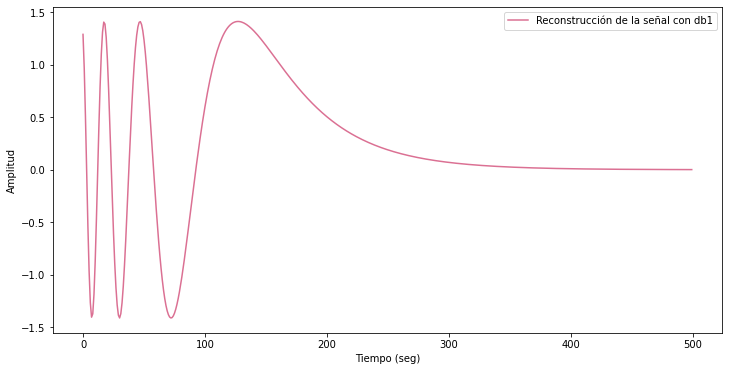

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(cA+cD, label='Reconstrucción de la señal con db1', color='PaleVioletRed')
plt.xlabel('Tiempo (seg)')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

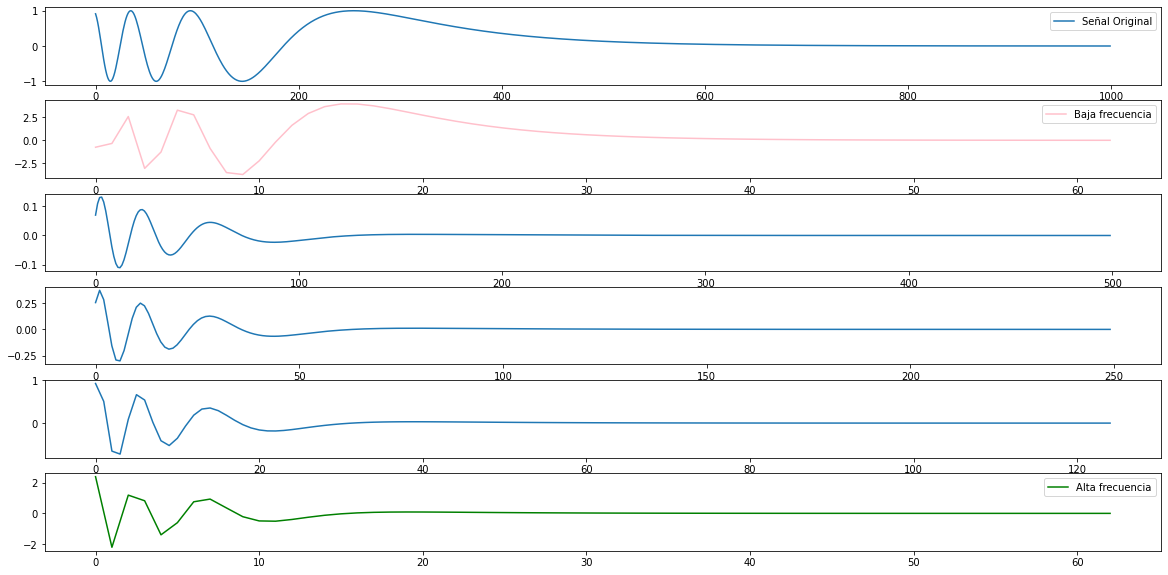

In [ ]:
cA1, cD1, cD2, cD3, cD4 = pywt.wavedec(X, 'db1', level = 4)
plt.figure(figsize=(20,10))
plt.subplot(6,1,1), plt.plot(X, label='Señal Original')
plt.legend()
plt.subplot(6,1,2), plt.plot(cA1, color='pink', label='Baja frecuencia')
plt.legend()
plt.subplot(6,1,3), plt.plot(cD4)
plt.subplot(6,1,4), plt.plot(cD3)
plt.subplot(6,1,5), plt.plot(cD2)
plt.subplot(6,1,6), plt.plot(cD1, color='green', label='Alta frecuencia')
plt.legend()
plt.show()

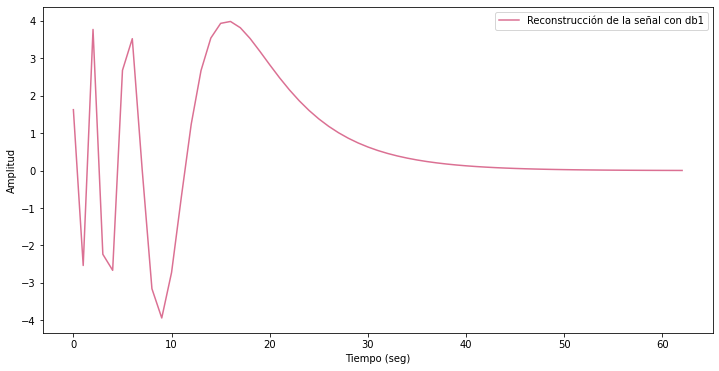

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(cA1+cD1, label='Reconstrucción de la señal con db1', color='PaleVioletRed')
plt.xlabel('Tiempo (seg)')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

### **Fourier.**

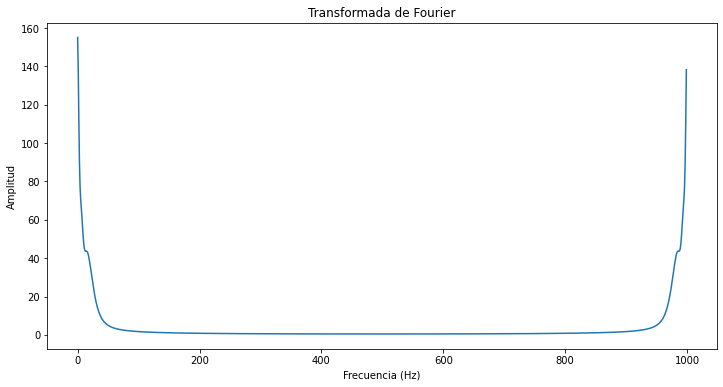

In [ ]:
a=np.abs(fft(X))
plt.figure(figsize=(12,6))
plt.plot(a)
plt.title("Transformada de Fourier")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.show()

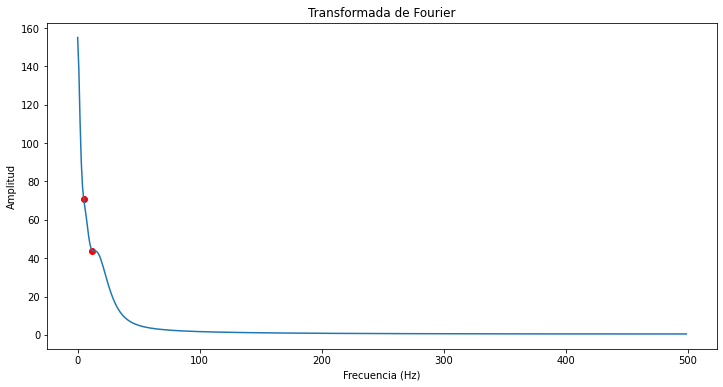

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(a[:500])
plt.scatter(12, 43.888521319608365, color='red')
plt.scatter(5, 70.67167143794659, color='red')
plt.title("Transformada de Fourier")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.show()

In [ ]:
busqueda=np.where(np.abs(a)>30)
busqueda

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23, 977, 978,
        979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991,
        992, 993, 994, 995, 996, 997, 998, 999]),)

In [ ]:
print('0 = ', np.abs(a[0]))
print('5 = ', np.abs(a[5]))
print('8 = ',np.abs(a[8]))
print('13 = ',np.abs(a[13]))
print('20 = ',np.abs(a[20]))

0 =  155.042376993352
5 =  70.67167143794659
8 =  56.61038048578426
13 =  43.627456696734335
20 =  37.44928541193785


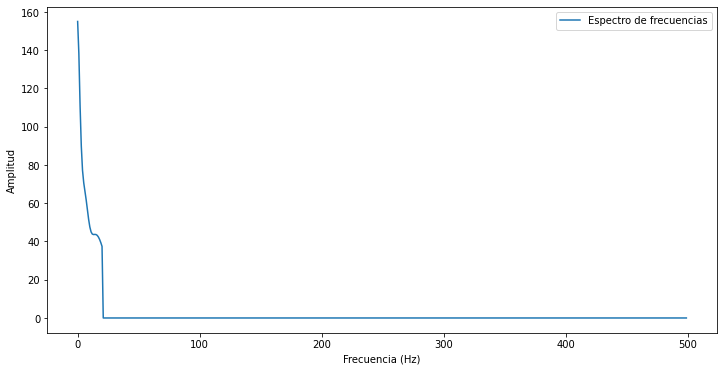

In [ ]:
for n in range(len(a)):
  if np.abs(a[n]) < 37.44928541193785:
    a[n] = 0

plt.figure(figsize=(12,6))
plt.plot(np.abs(a)[:500], label='Espectro de frecuencias')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


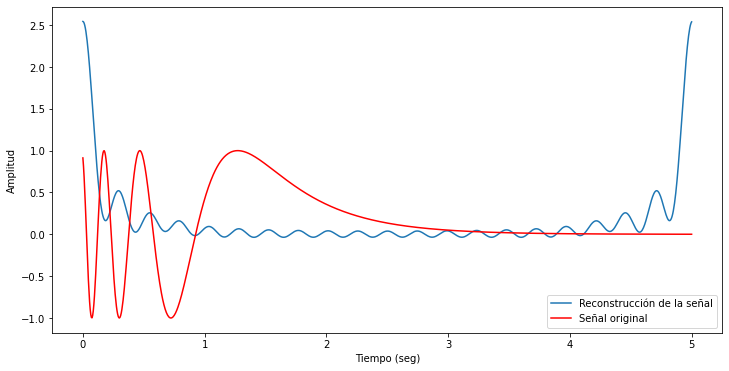

In [ ]:
b=ifft(a)

plt.figure(figsize=(12,6))
plt.plot(t1, b, label='Reconstrucción de la señal')
plt.plot(t1, X, color='red', label='Señal original')
plt.xlabel('Tiempo (seg)')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

### **Cambio temporal de la función.**

$$f(-t)=sen(20e^{2t})$$

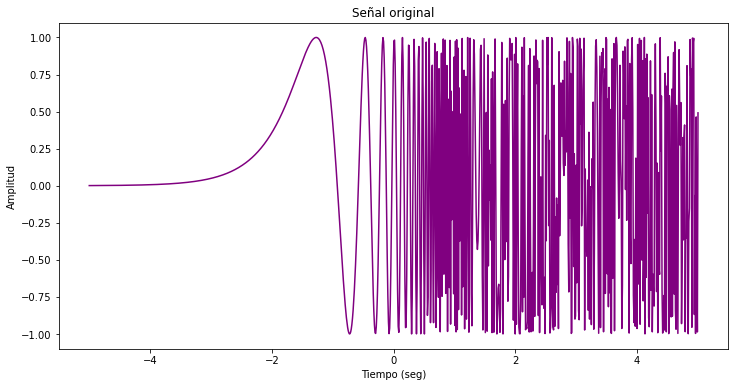

In [ ]:
t2 = np.linspace(-5,5, 1000)
Y = np.sin(20*np.exp(2*t2))

plt.figure(figsize=(12,6))
plt.plot(t2, Y, color='purple')
plt.title("Señal original")
plt.xlabel('Tiempo (seg)')
plt.ylabel('Amplitud')
plt.show()

#### **Wavelet (Daubechies.)**

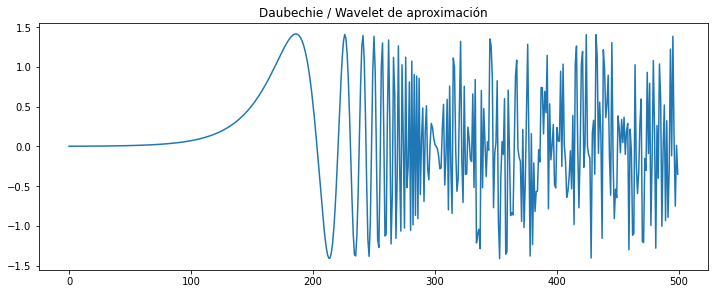

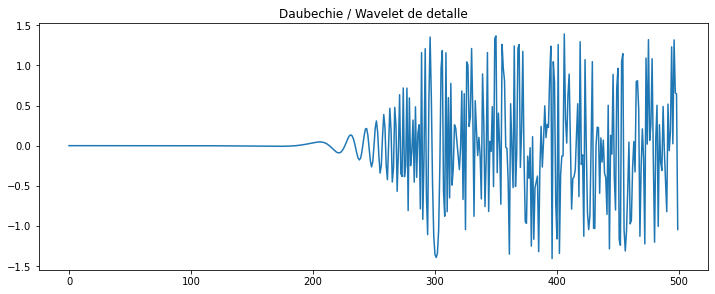

In [ ]:
cAy, cDy = pywt.dwt(Y, 'db1')
plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
plt.title("Daubechie / Wavelet de aproximación")
plt.plot(cAy)     # Calculando la aproximación

plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.title("Daubechie / Wavelet de detalle")
plt.plot(cDy)     # Calculando el detalle

plt.show()

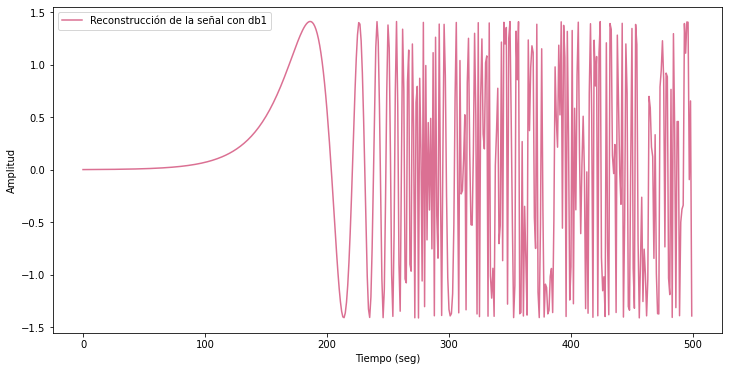

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(cAy+cDy, label='Reconstrucción de la señal con db1', color='PaleVioletRed')
plt.xlabel('Tiempo (seg)')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

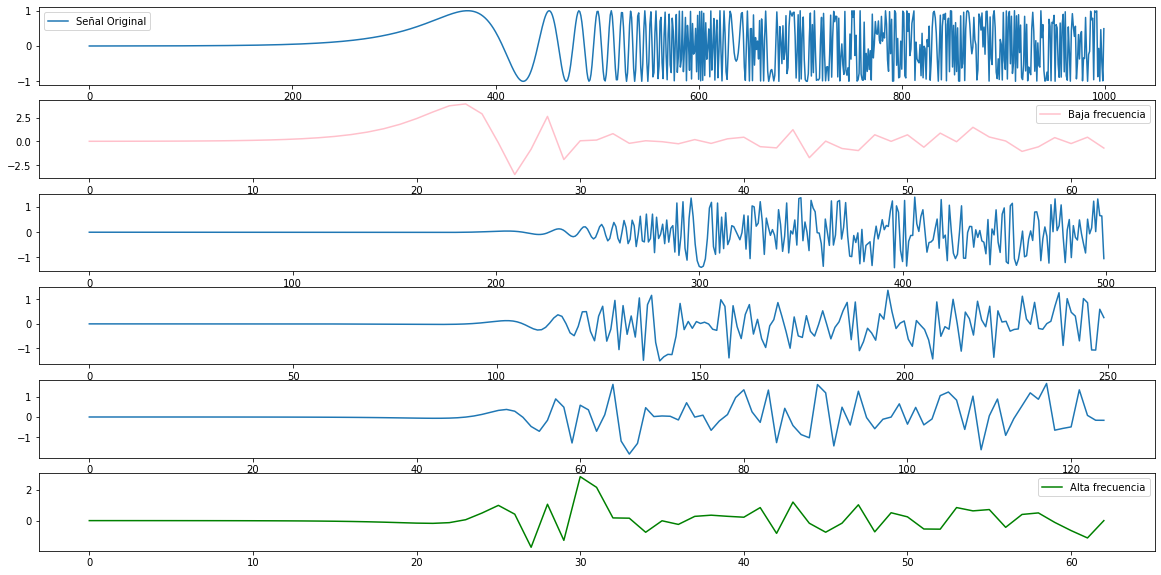

In [ ]:
cA1y, cD1y, cD2y, cD3y, cD4y = pywt.wavedec(Y, 'db1', level = 4)
plt.figure(figsize=(20,10))
plt.subplot(6,1,1), plt.plot(Y, label='Señal Original')
plt.legend()
plt.subplot(6,1,2), plt.plot(cA1y, color='pink', label='Baja frecuencia')
plt.legend()
plt.subplot(6,1,3), plt.plot(cD4y)
plt.subplot(6,1,4), plt.plot(cD3y)
plt.subplot(6,1,5), plt.plot(cD2y)
plt.subplot(6,1,6), plt.plot(cD1y, color='green', label='Alta frecuencia')
plt.legend()
plt.show()

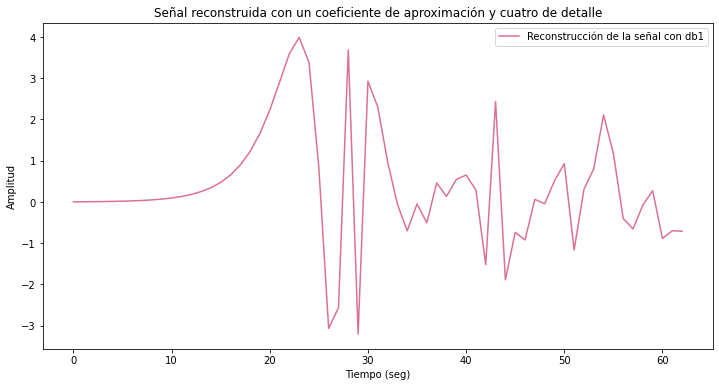

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(cA1y+cD1y, label='Reconstrucción de la señal con db1', color='PaleVioletRed')
plt.title("Señal reconstruida con un coeficiente de aproximación y cuatro de detalle")
plt.xlabel('Tiempo (seg)')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

#### **Fourier.**

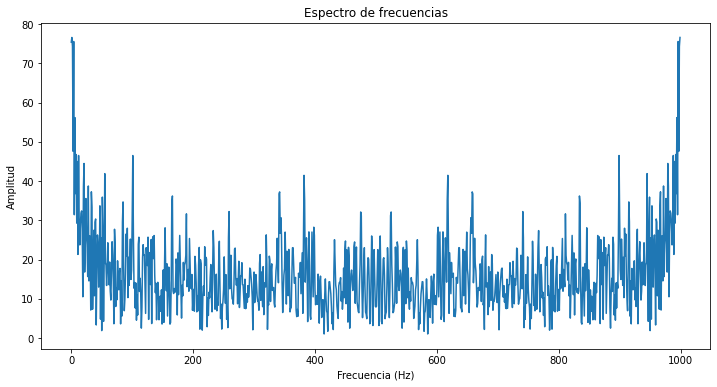

In [ ]:
b = np.abs(fft(Y))
plt.figure(figsize=(12,6))
plt.plot(b)
plt.title("Espectro de frecuencias")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.show()

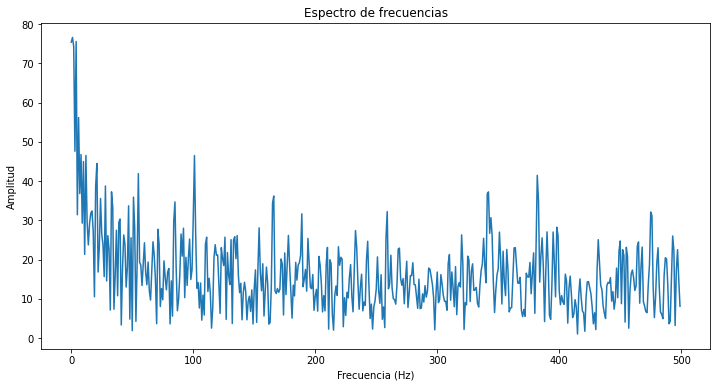

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(b[:500])
plt.title("Espectro de frecuencias")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.show()

In [ ]:
busqueda=np.where(np.abs(b)>45)
busqueda

(array([  0,   1,   2,   3,   4,   6,   8,  12, 101, 899, 988, 992, 994,
        996, 997, 998, 999]),)

In [ ]:
print('999= ', np.abs(b[999]))
print('100 = ', np.abs(b[101]))
print('383 = ',np.abs(b[383]))
print('166 = ',np.abs(b[166]))
print('2 = ',np.abs(b[2]))

999=  76.60818094342993
100 =  46.51987964561837
383 =  35.09515383515131
166 =  36.21544380403051
2 =  74.33111850979594


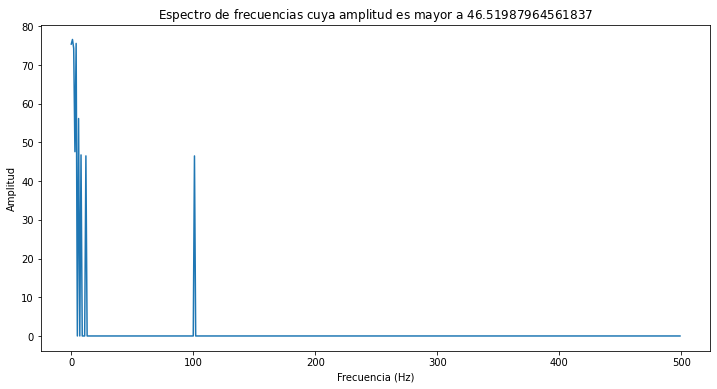

In [ ]:
for n in range(len(b)):
  if np.abs(b[n]) <  46.51987964561837:
    b[n] = 0

plt.figure(figsize=(12,6))
plt.plot(np.abs(b)[:500])
plt.title('Espectro de frecuencias cuya amplitud es mayor a $ 46.51987964561837$')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


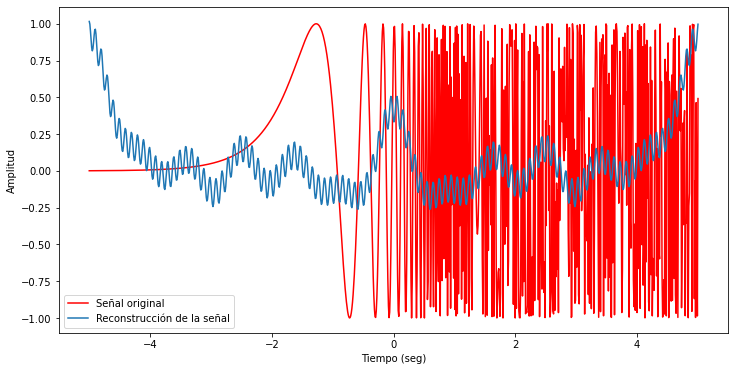

In [ ]:
c=ifft(b)

plt.figure(figsize=(12,6))
plt.plot(t2, Y, color='red', label='Señal original')
plt.plot(t2, c, label='Reconstrucción de la señal')
plt.xlabel('Tiempo (seg)')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

# **ECG (ejemplo).**

Cargando y graficando los datos.

In [ ]:
import numpy as np   
import pandas as pd  
from google.colab import files
import scipy, matplotlib 
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt

uploaded = files.upload()

Saving ECG 3.csv to ECG 3.csv


In [ ]:
datosp = pd.read_csv('ECG 3.csv',sep=';',low_memory=False)
datosp

Elapsed time    ECG
0            0.000 -0.165
1            0.008 -0.155
2            0.016 -0.195
3            0.023 -0.205
4            0.031 -0.185
...            ...    ...
1275         9.961 -0.115
1276         9.969 -0.135
1277         9.977 -0.155
1278         9.984 -0.155
1279         9.992 -0.165

[1280 rows x 2 columns]

In [ ]:
df=pd.DataFrame(datosp)
print(df)

c1=df.iloc [:, 0]
c2=df.iloc [:, 1]

a=np.array(c1)
b=np.array(c2)

      Elapsed time    ECG
0            0.000 -0.165
1            0.008 -0.155
2            0.016 -0.195
3            0.023 -0.205
4            0.031 -0.185
...            ...    ...
1275         9.961 -0.115
1276         9.969 -0.135
1277         9.977 -0.155
1278         9.984 -0.155
1279         9.992 -0.165

[1280 rows x 2 columns]


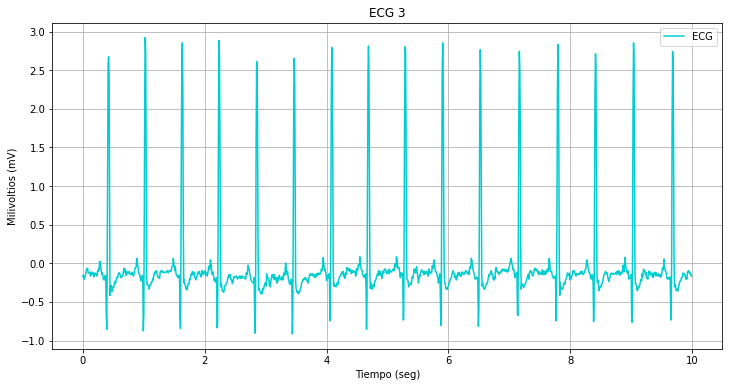

In [ ]:
t=a
mv=b

plt.figure(figsize=(12,6))
plt.plot(t,mv, label='ECG', color='DarkTurquoise')
plt.title('ECG 3', fontsize=12)
plt.xlabel('Tiempo (seg)')
plt.ylabel('Milivoltios (mV)')
plt.legend()
plt.grid()
plt.show()

Calculando el promedio de los datos.

In [ ]:
import statistics

promedio_señal = statistics.mean(b)
print(promedio_señal)

-0.046234375


### **Eliminación de la línea de base utilizando análisis de Fourier.**

Realizando el espectro de frecuencias del ECG 3.

[]

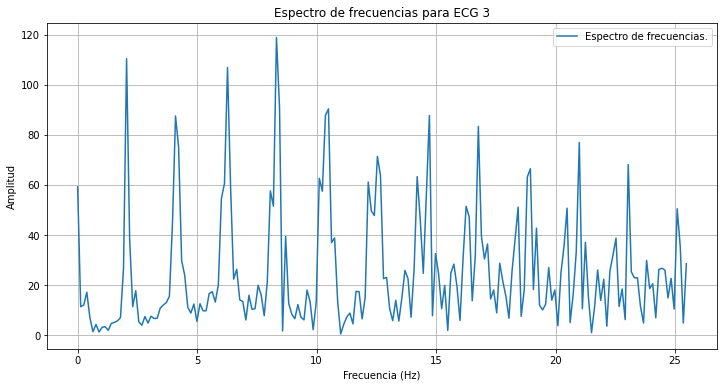

In [ ]:
# Número de puntos de la señal adquirida en el dominio del tiempo.
N=10000

# Frecuencia a la que se muestreó la señal adquirida en el dominio del tiempo.
fs=1280

# Delta de f
deltaf=fs/N

# Líneas de frecuencia.
lf=np.arange(0,N*deltaf,deltaf)

# Transformada de Fourier.
tf=fft(mv)

plt.figure(figsize=(12,6))
plt.plot(lf[:200],np.abs(tf)[:200], label='Espectro de frecuencias.')
plt.title('Espectro de frecuencias para ECG 3')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()
plt.plot()

¿En qué posiciones se encuentran las amplitudes con valores mayores a 100?

In [ ]:
# ¿Cuáles posiciones frecuenciales tienen un amplitud mayor a 100?

busqueda_frecuencial=np.where(np.abs(tf)>100)
busqueda_frecuencial

(array([  16,   49,   65, 1215, 1231, 1264]),)

¿Cuánto es el valor frecuencial encontrada en dichas posiciones?

In [ ]:
print(lf[16])
print(lf[49])
print(lf[65])

2.048
6.272
8.32


¿Cuánto es el valor referente a la amplitud encontrada en dichas posiciones?

In [ ]:
print(np.abs(tf[16]))
print(np.abs(tf[49]))
print(np.abs(tf[65]))

110.35964110790928
106.85368475335731
118.83844619050613


Dentro de la búsqueda frecuencial, ¿cuál es el valor máximo de aquella posición frecuencial?

In [ ]:
# Dentro de la búsqueda frecuencial, ¿cuál es el valor máximo de aquella 
# posición frecuencial?

for z in busqueda_frecuencial:
  lista = np.abs(tf[z])

amplitud_max = max(lista)
amplitud_max

118.83844619050613

Eliminamos el pico más alto y realizamos la reconstrucción de la señal con los datos nuevos.

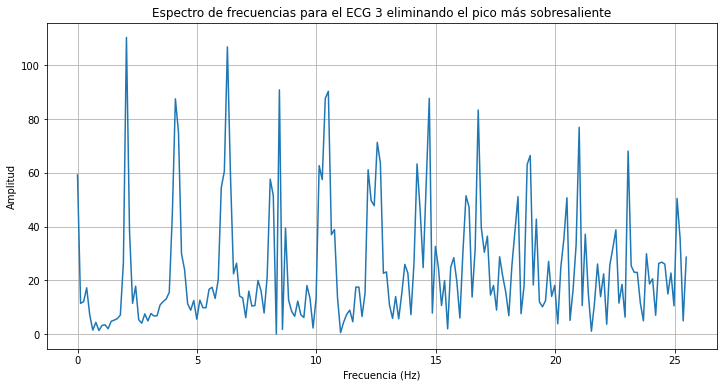

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


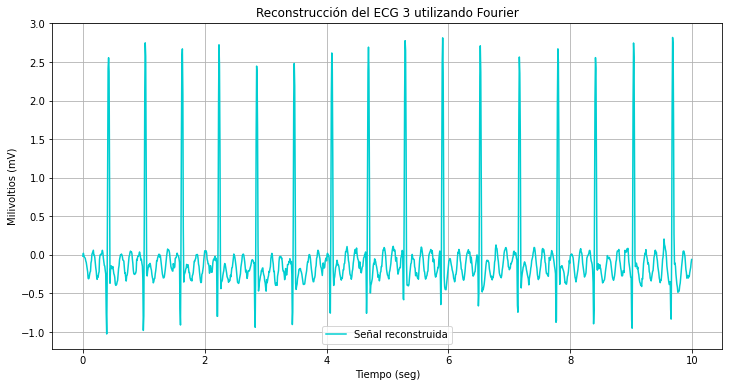

In [ ]:
for n in range(len(tf)):
  if np.abs(tf[n]) == 118.83844619050613:
    tf[n] = 0

plt.figure(figsize=(12,6))
plt.plot(lf[:200],np.abs(tf)[:200])
#plt.scatter(8.32, 118.83844619050613, color='red')
plt.title('Espectro de frecuencias para el ECG 3 eliminando el pico más sobresaliente')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()


tfi2=ifft(tf)

plt.figure(figsize=(12,6))
plt.plot(t, tfi2, label='Señal reconstruida', color='DarkTurquoise')
plt.title('Reconstrucción del ECG 3 utilizando Fourier')
plt.xlabel('Tiempo (seg)')
plt.ylabel('Milivoltios (mV)')
plt.grid()
plt.legend()
plt.show()

Realizando análisis de Wavelets para eliminar por completo la línea de base.

In [ ]:
import pywt 

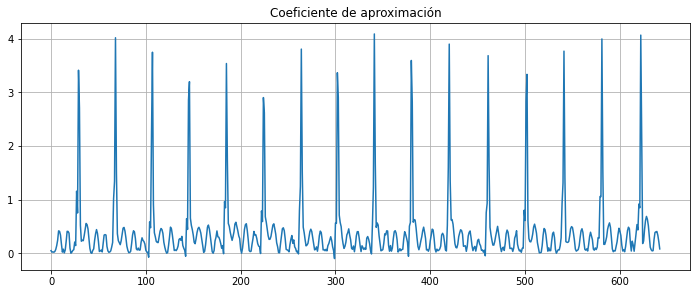

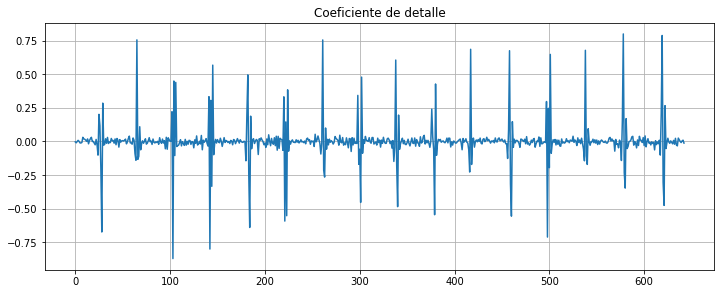

In [ ]:
# Descomposición Wavelet.

cA, cD = pywt.dwt(np.abs(tfi2), 'db4')
plt.figure(figsize=(12,10))

plt.subplot(2,1,1)
plt.title("Coeficiente de aproximación")
plt.plot(cA)     
plt.grid()

plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.title("Coeficiente de detalle")
plt.plot(cD)     

plt.grid()
plt.show()

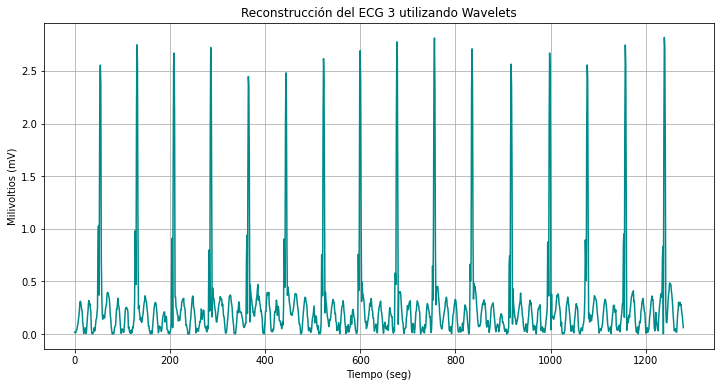

In [ ]:
reconstruccion = pywt.idwt(cA, cD, 'db4')

plt.figure(figsize=(12,6))
plt.plot(reconstruccion, color='darkcyan')
plt.title("Reconstrucción del ECG 3 utilizando Wavelets")
plt.xlabel("Tiempo (seg)")
plt.ylabel("Milivoltios (mV)")
plt.grid()
plt.show()

Note que la cantidad de datos se siguen manteniendo.

In [ ]:
len(reconstruccion)

1280

Calculando el promedio de la señal reconstruida.

In [ ]:
import statistics

promedio_reconstruccion = statistics.mean(reconstruccion)
print(promedio_reconstruccion)

0.28129919422195926


De acuerdo con la longitud de mis datos, ¿cuál es el mejor nivel de descomposición de mis datos?

In [ ]:
w = pywt.Wavelet('db5')
pywt.dwt_max_level(len(reconstruccion), filter_len=w.dec_len)

7

¿Cuál será la longitud máxima filtrada por los coeficientes de detalle de la señal cardíaca?

In [ ]:
pywt.dwt_coeff_len(len(reconstruccion), filter_len=w.dec_len, mode='symmetric')

644

Realizando la descomposición de la señal hasta el coeficiente de detalle 8 utilizando db4.

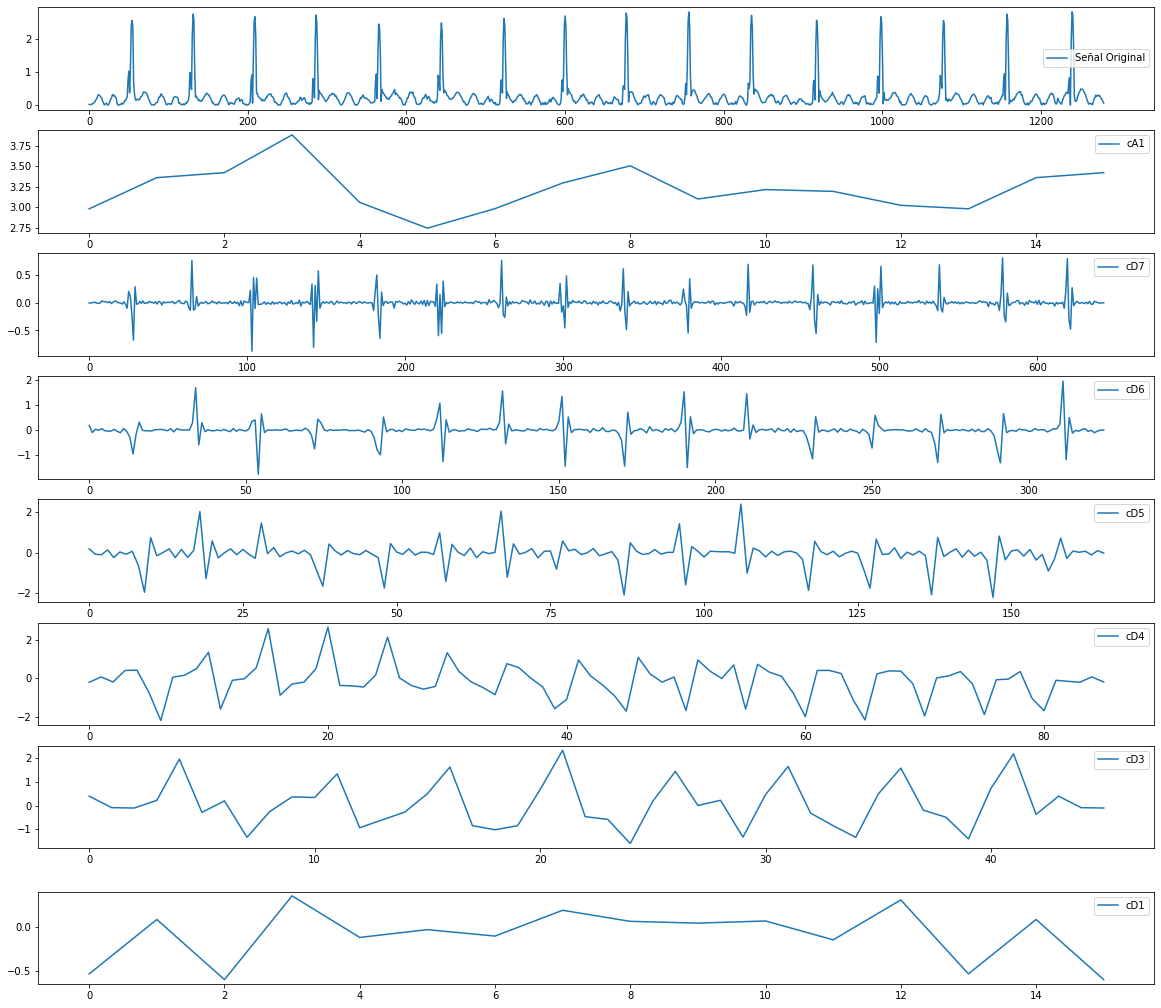

In [ ]:
# Descomposición Wavelet.

cA1, cD1, cD2, cD3, cD4, cD5, cD6, cD7= pywt.wavedec(reconstruccion, 'db4', mode='periodic', axis=0, level = 7)
plt.figure(figsize=(20,20))
plt.subplot(9,1,1), plt.plot(reconstruccion, label='Señal Original')
plt.legend()
plt.subplot(9,1,2), plt.plot(cA1, label='cA1')
plt.legend()
plt.subplot(9,1,3), plt.plot(cD7, label='cD7')
plt.legend()
plt.subplot(9,1,4), plt.plot(cD6, label='cD6')
plt.legend()
plt.subplot(9,1,5), plt.plot(cD5, label='cD5')
plt.legend()
plt.subplot(9,1,6), plt.plot(cD4, label='cD4')
plt.legend()
plt.subplot(9,1,7), plt.plot(cD3, label='cD3')
plt.legend()
plt.subplot(9,1,8), plt.plot(cD2, label='cD2')
plt.legend()
plt.subplot(10,1,9), plt.plot(cD1, label='cD1')
plt.legend()
plt.show()

Por otro lado, en la siguiente línea de código calculamos los coeficientes de correlación que hay entre cada una de las señales descompuestas individualmente $y(i)$ con la señal original $x(i)$, donde $\overline{x}$ y $\overline{y}$ hacen referencia a los promedios de la señal original y sus descomposiciones individuales, respectivamente.

$$C = 100 ⋅ \dfrac{∑_{i = 1}^{N}(x(i)-\overline{x}) ⋅ (y(i)-\overline{y})}{\sqrt{∑_{i = 1}^{N}(x(i)-\overline{x})^2 ⋅ ∑_{i = 1}^{N} (y(i)-\overline{y})^2}}$$

Calculando los promedios de cada coeficiente de detalle:

### **Cálculo de coeficientes de correlación.**

2. **Teniendo en cuenta que $\overline{x}_{so}=ps$ y $\overline{y}=pcDi$ para $i=1,2,3, \cdots, 7$.**

In [ ]:
pcD1 = statistics.mean(cD1)
pcD2 = statistics.mean(cD2)
pcD3 = statistics.mean(cD3)
pcD4 = statistics.mean(cD4)
pcD5 = statistics.mean(cD5)
pcD6 = statistics.mean(cD6)
pcD7 = statistics.mean(cD7)

In [ ]:
import statistics

promedio_reconstruccion = statistics.mean(reconstruccion)
print(promedio_reconstruccion)

0.28129919422195926


In [ ]:
C = []

for n in range(len(cD1)):
  numerador1 = np.sum((reconstruccion[n]-promedio_reconstruccion)*(np.abs(cD1[n])-pcD1))
  denominador1 = np.sqrt(np.sum((reconstruccion[n]-promedio_reconstruccion)**2*(np.abs(cD1[n])-pcD1)**2))
  total1 = 100*(numerador1 / denominador1)

for m in range(len(cD2)):
  numerador2 = np.sum((reconstruccion[m]-promedio_reconstruccion)*(np.abs(cD2[m])-pcD2))
  denominador2 = np.sqrt(np.sum((reconstruccion[m]-promedio_reconstruccion)**2*(np.abs(cD2[m])-pcD2)**2))
  total2 = 100*(numerador2 / denominador2)

for o in range(len(cD3)):
  numerador3 = np.sum((reconstruccion[o]-promedio_reconstruccion)*(np.abs(cD3[o])-pcD3))
  denominador3 = np.sqrt(np.sum((reconstruccion[o]-promedio_reconstruccion)**2*(np.abs(cD3[o])-pcD3)**2))
  total3 = 100*(numerador3 / denominador3)

for p in range(len(cD4)):
  numerador4 = np.sum((reconstruccion[p]-promedio_reconstruccion)*(np.abs(cD4[p])-pcD4))
  denominador4 = np.sqrt(np.sum((reconstruccion[p]-promedio_reconstruccion)**2*(np.abs(cD4[p])-pcD4)**2))
  total4 = 100*(numerador4 / denominador4)

for q in range(len(cD5)):
  numerador5 = np.sum((reconstruccion[q]-promedio_reconstruccion)*(np.abs(cD5[q])-pcD5))
  denominador5 = np.sqrt(np.sum((reconstruccion[q]-promedio_reconstruccion)**2*(np.abs(cD5[q])-pcD5)**2))
  total5 = 100*(numerador5 / denominador5)

for r in range(len(cD6)):
  numerador6 = np.sum((reconstruccion[r]-promedio_reconstruccion)*(np.abs(cD6[r])-pcD6))
  denominador6 = np.sqrt(np.sum((reconstruccion[r]-promedio_reconstruccion)**2*(np.abs(cD6[r])-pcD6)**2))
  total6 = 100*(numerador6 / denominador6)

for s in range(len(cD7)):
  numerador7 = np.sum((reconstruccion[s]-promedio_reconstruccion)*(np.abs(cD7[s])-pcD7))
  denominador7 = np.sqrt(np.sum((reconstruccion[s]-promedio_reconstruccion)**2*(np.abs(cD7[s])-pcD7)**2))
  total7 = 100*(numerador7 / denominador7)

C.append([total1,total2, total3, total4, total5, total6, total7])

In [ ]:
print(C)

[[-100.0, -100.0, -99.99999999999999, -100.0, -100.0, 100.0, 100.0]]


### **Método de umbralización.**

El umbral se calcula como el 15% del valor máximo del vector referente a los valores del coeficiente de detalle seleccionado.

In [ ]:
umbral = 0.15*max(cD7)
umbral

0.12022832857380288

Mediante el siguiente código se buscan aquellas posiciones en donde se supera el umbral (amplitud) calculado.

In [ ]:
complejos = np.where(cD7 > umbral)
complejos

(array([ 25,  29,  65, 102, 104, 106, 141, 143, 145, 181, 182, 185, 220,
        222, 224, 261, 298, 302, 338, 341, 376, 380, 417, 458, 461, 497,
        499, 501, 538, 577, 578, 581, 618, 619, 622]),)

Mediante el siguiente código eliminamos aquellas posiciones que son menores que el umbral, con el fin de localizar por completo los complejos QRS.

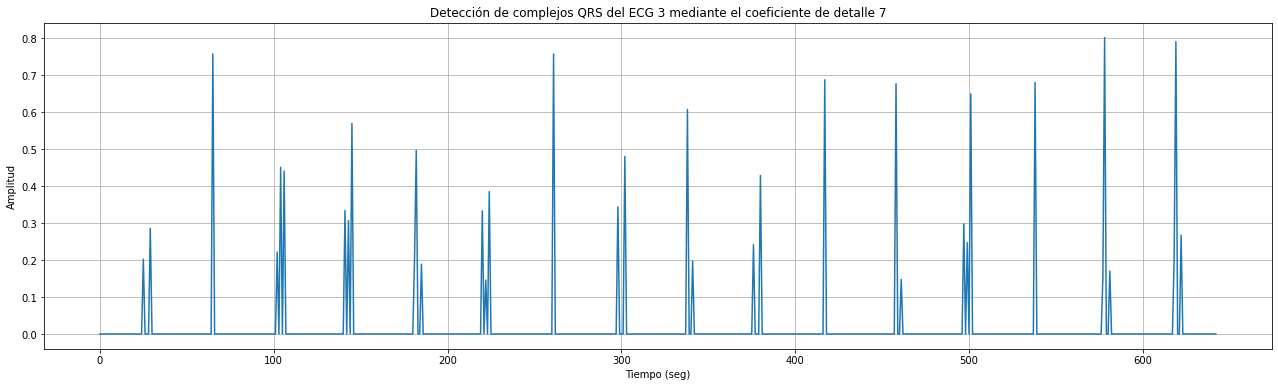

In [ ]:
for z in range(len(cD7)):
  if cD7[z] < umbral:
    cD7[z] = 0

plt.figure(figsize=(22,6))
plt.plot(cD7)
plt.title('Detección de complejos QRS del ECG 3 mediante el coeficiente de detalle 7')
plt.xlabel('Tiempo (seg)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

### **Comparación de detecciones.**

Para este paso se van a comparar los gráficos en donde se han obtenido los complejos QRS con el fin de determinar diferencias entre ambos.

In [ ]:
import numpy as np   
import pandas as pd  
from google.colab import files
import scipy, matplotlib 
from scipy.fft import fft, ifft
import matplotlib.pyplot as plt
import pywt 

uploaded = files.upload()

Saving ECG 2.csv to ECG 2.csv
Saving ECG 1.csv to ECG 1.csv


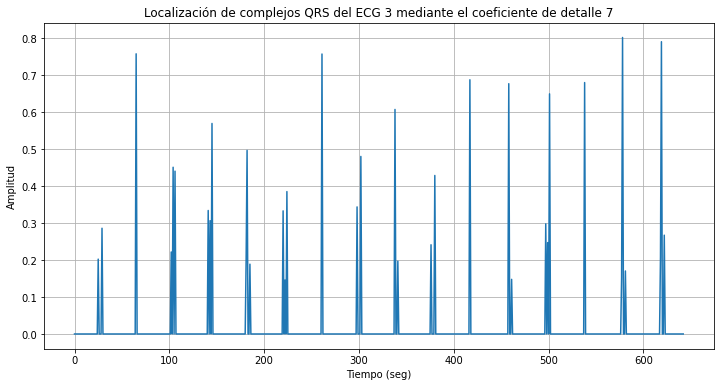

In [ ]:
# Datos del ECG.
datosp = pd.read_csv('ECG 3.csv',sep=';',low_memory=False)
df=pd.DataFrame(datosp)
c1=df.iloc [:, 0]
c2=df.iloc [:, 1]
a=np.array(c1)
b=np.array(c2)
t=a
mv=b

# Eliminación de la línea de base por medio de Fourier.
N=10000
fs=1280
deltaf=fs/N
lf=np.arange(0,N*deltaf,deltaf)
tf=fft(mv)
busqueda_frecuencial=np.where(np.abs(tf)>100)
for z in busqueda_frecuencial:
  lista = np.abs(tf[z])

amplitud_max = max(lista)

for n in range(len(tf)):
  if np.abs(tf[n]) == amplitud_max:
    tf[n] = 0

tfi2=ifft(tf)

# Eliminación completa de la línea de base mediante Wavelet.
cA, cD = pywt.dwt(np.abs(tfi2), 'db4')
reconstruccion = pywt.idwt(cA, cD, 'db4')

# Descomposición Wavelet.
cA1, cD1, cD2, cD3, cD4, cD5, cD6, cD7_3= pywt.wavedec(reconstruccion, 'db4', mode='periodic', axis=0, level = 7)

# Cálculo del umbral.
umbral = 0.15*max(cD7_3)

# Detección de complejos QRS.
for z in range(len(cD7_3)):
  if cD7_3[z] < umbral:
    cD7_3[z] = 0

plt.figure(figsize=(12,6))
plt.plot(cD7_3)
plt.title('Localización de complejos QRS del ECG 3 mediante el coeficiente de detalle 7')
plt.xlabel('Tiempo (seg)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

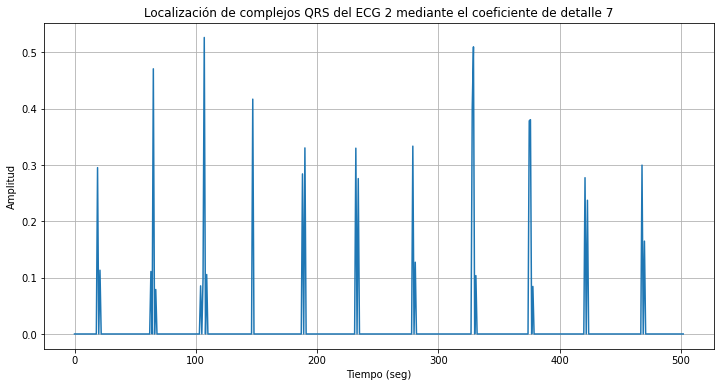

In [ ]:
# Datos del ECG.
datosp = pd.read_csv('ECG 2.csv',sep=';',low_memory=False)
df=pd.DataFrame(datosp)
c1=df.iloc [:, 0]
c2=df.iloc [:, 1]
a=np.array(c1)
b=np.array(c2)
t=a
mv=b

# Eliminación de la línea de base por medio de Fourier.
N=10000
fs=1280
deltaf=fs/N
lf=np.arange(0,N*deltaf,deltaf)
tf=fft(mv)
busqueda_frecuencial=np.where(np.abs(tf)>25)
for z in busqueda_frecuencial:
  lista = np.abs(tf[z])

amplitud_max = max(lista)

for n in range(len(tf)):
  if np.abs(tf[n]) == amplitud_max:
    tf[n] = 0

tfi2=ifft(tf)

# Eliminación completa de la línea de base mediante Wavelet.
cA, cD = pywt.dwt(np.abs(tfi2), 'db4')
reconstruccion = pywt.idwt(cA, cD, 'db4')

# Descomposición Wavelet.
cA1, cD1, cD2, cD3, cD4, cD5, cD6, cD7_2= pywt.wavedec(reconstruccion, 'db4', mode='periodic', axis=0, level = 7)

# Cálculo del umbral.
umbral = 0.15*max(cD7_2)

# Detección de complejos QRS.
for z in range(len(cD7_2)):
  if cD7_2[z] < umbral:
    cD7_2[z] = 0

plt.figure(figsize=(12,6))
plt.plot(cD7_2)
plt.title('Localización de complejos QRS del ECG 2 mediante el coeficiente de detalle 7')
plt.xlabel('Tiempo (seg)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

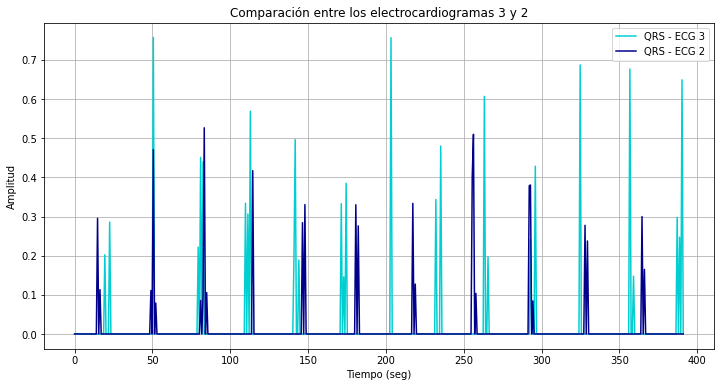

In [ ]:
P = np.linspace(0, 500, 643)

plt.figure(figsize=(12,6))
plt.plot(P[:503],cD7_3[:503], color='DarkTurquoise', label='QRS - ECG 3')
plt.plot(P[:503],cD7_2[:503], color='Darkblue', label='QRS - ECG 2')
plt.title('Comparación entre los electrocardiogramas 3 y 2')
plt.xlabel('Tiempo (seg)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()
plt.show()

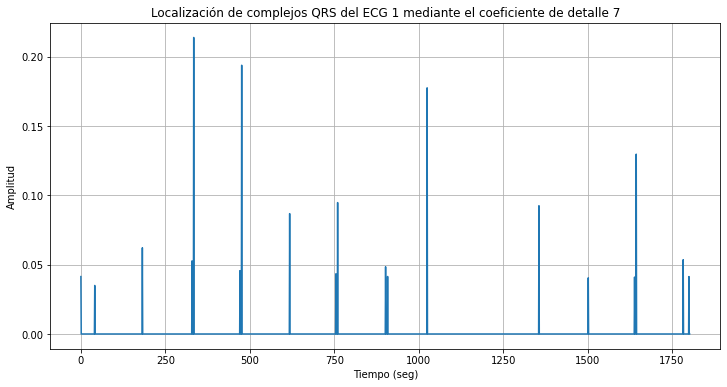

In [ ]:
# Datos del ECG.
datosp = pd.read_csv('ECG 1.csv',sep=';',low_memory=False)
df=pd.DataFrame(datosp)
c1=df.iloc [:, 0]
c2=df.iloc [:, 1]
a=np.array(c1)
b=np.array(c2)
t=a
mv=b

# Eliminación de la línea de base por medio de Fourier.
N=10000
fs=1280
deltaf=fs/N
lf=np.arange(0,N*deltaf,deltaf)
tf=fft(mv)
busqueda_frecuencial=np.where(np.abs(tf)>68)
for z in busqueda_frecuencial:
  lista = np.abs(tf[z])

amplitud_max = max(lista)

for n in range(len(tf)):
  if np.abs(tf[n]) == amplitud_max:
    tf[n] = 0

tfi2=ifft(tf)

# Eliminación completa de la línea de base mediante Wavelet.
cA, cD = pywt.dwt(np.abs(tfi2), 'db4')
reconstruccion = pywt.idwt(cA, cD, 'db4')

# Descomposición Wavelet.
cA1, cD1, cD2, cD3, cD4, cD5, cD6, cD7_1= pywt.wavedec(reconstruccion, 'db4', mode='periodic', axis=0, level = 7)

# Cálculo del umbral.
umbral = 0.15*max(cD7_1)

# Detección de complejos QRS.
for z in range(len(cD7_1)):
  if cD7_1[z] < umbral:
    cD7_1[z] = 0

plt.figure(figsize=(12,6))
plt.plot(cD7_1)
plt.title('Localización de complejos QRS del ECG 1 mediante el coeficiente de detalle 7')
plt.xlabel('Tiempo (seg)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

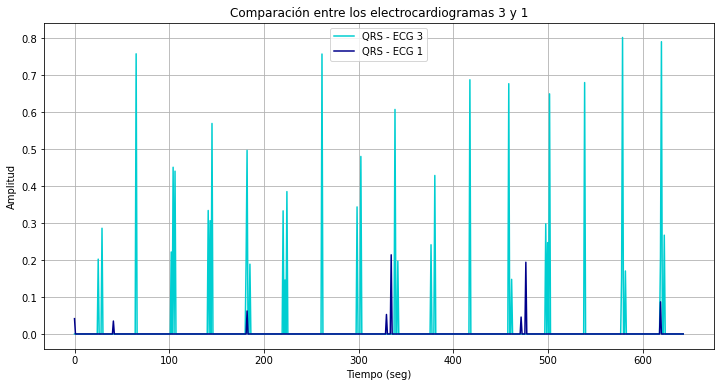

In [ ]:
P = np.linspace(0, 643, 643)

plt.figure(figsize=(12,6))
plt.plot(P,cD7_3, color='DarkTurquoise', label='QRS - ECG 3')
plt.plot(P[:643],cD7_1[:643], color='Darkblue', label='QRS - ECG 1')
plt.title('Comparación entre los electrocardiogramas 3 y 1')
plt.xlabel('Tiempo (seg)')
plt.ylabel('Amplitud')
plt.grid()
plt.legend()
plt.show()

# **Escalogramas.**

Recordemos que la transformada continua de Wavelet (CWT) de una señal $f(t)$ está descrita por la siguiente ecuación:

$$CWT(a,b)=\dfrac{1}{\sqrt{a}}\int_{-\infty}^{\infty}f(t)\psi^{*}\left(\dfrac{t-b}{a}\right)~dt$$

donde $a$ y $b$ son los parámetros de escala y posición, respectivamente.

El parámetro $a$ determina qué tan comprimida o estirada se encuentra la ondícula. Mientras que $b$ indica el desplazamiento de la wavelet a lo largo del tiempo $t$.

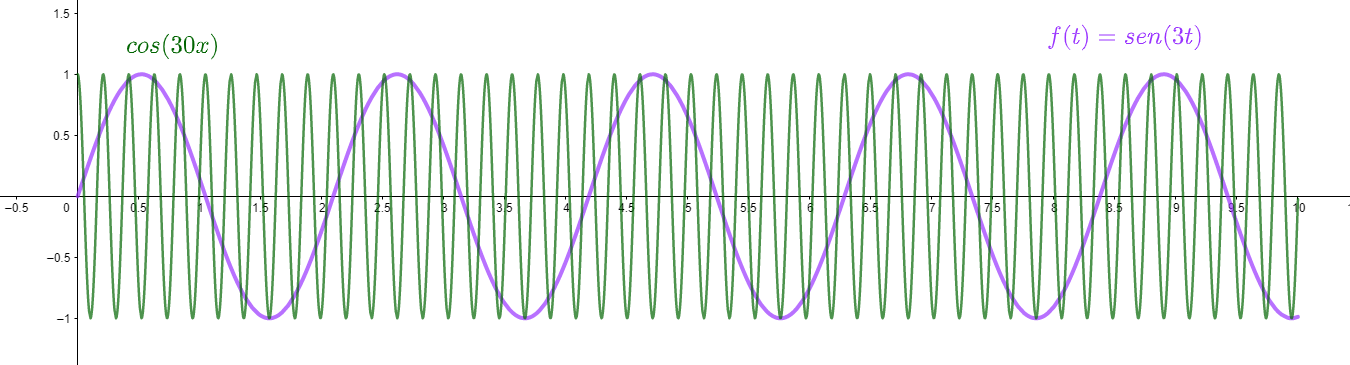

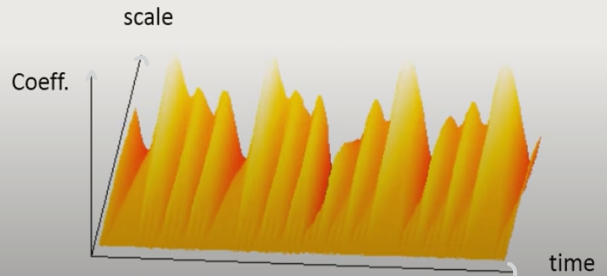

### **Ejemplos con ECG.**

In [ ]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

**ECG 3: Ritmo cardiaco normal del corazón.**

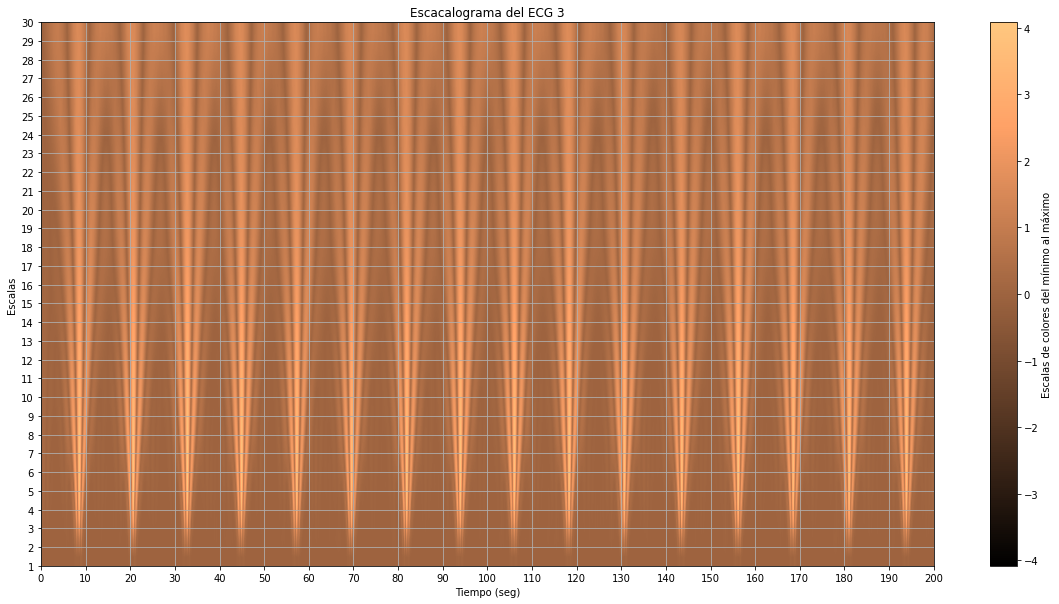

In [ ]:
t = a
señal = mv
escalas = np.arange(1,31)
coef, freqs = pywt.cwt(señal, escalas, 'gaus4')

plt.figure(figsize=(20,10))
plt.imshow(abs(coef), extent=[0,200,30,1], interpolation='bilinear', cmap='copper', aspect='auto', vmax=abs(coef).max(), vmin=-abs(coef).max())
plt.gca().invert_yaxis()
plt.yticks(np.arange(1,31,1))
plt.xticks(np.arange(0,201,10))
plt.colorbar(label='Escalas de colores del mínimo al máximo')
plt.title('Escalograma del ECG 3', fontsize=12)
plt.xlabel('Tiempo (seg)')
plt.ylabel('Escalas')
plt.grid()
plt.show()

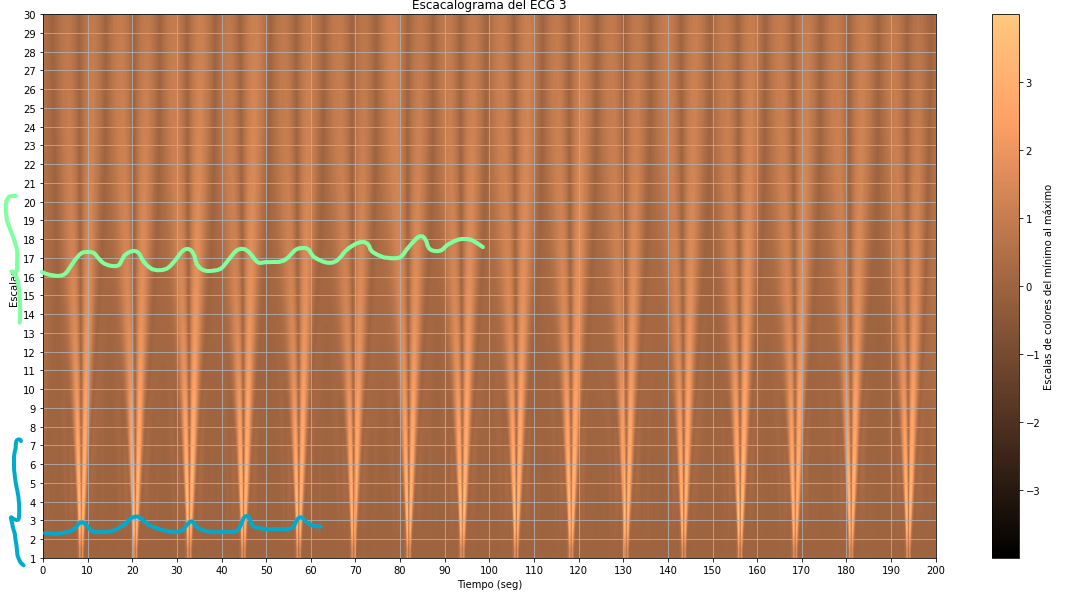

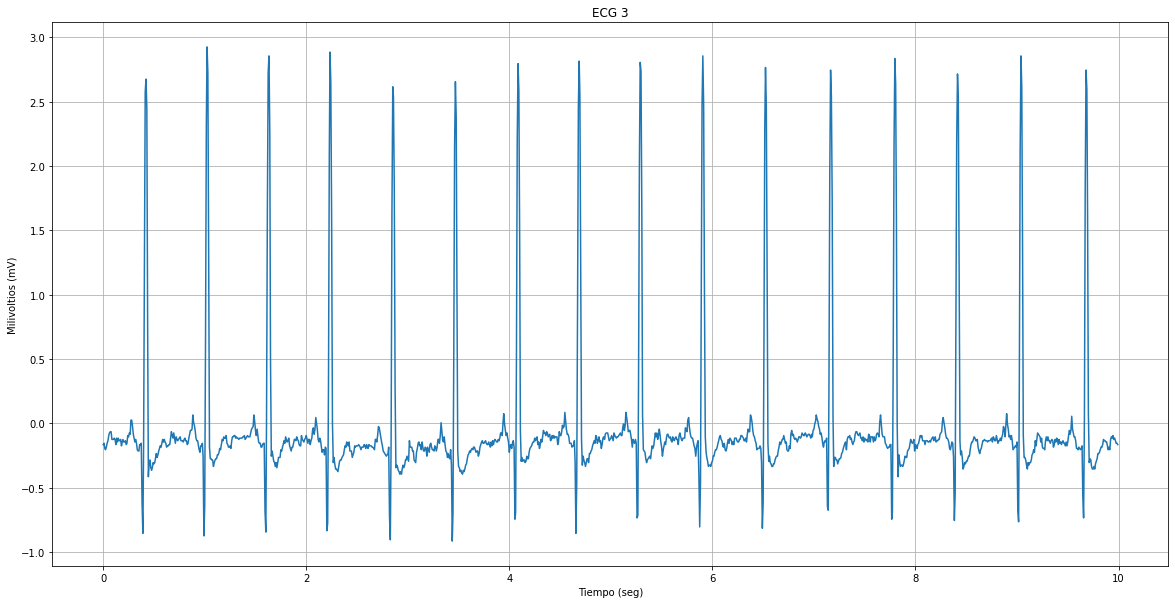

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(t,señal)
plt.title('ECG 3', fontsize=12)
plt.xlabel('Tiempo (seg)')
plt.ylabel('Milivoltios (mV)')
plt.grid()
plt.show()

**ECG 2: Ritmo cardiaco de una persona que presenta el síndrome de la apnea del sueño.**

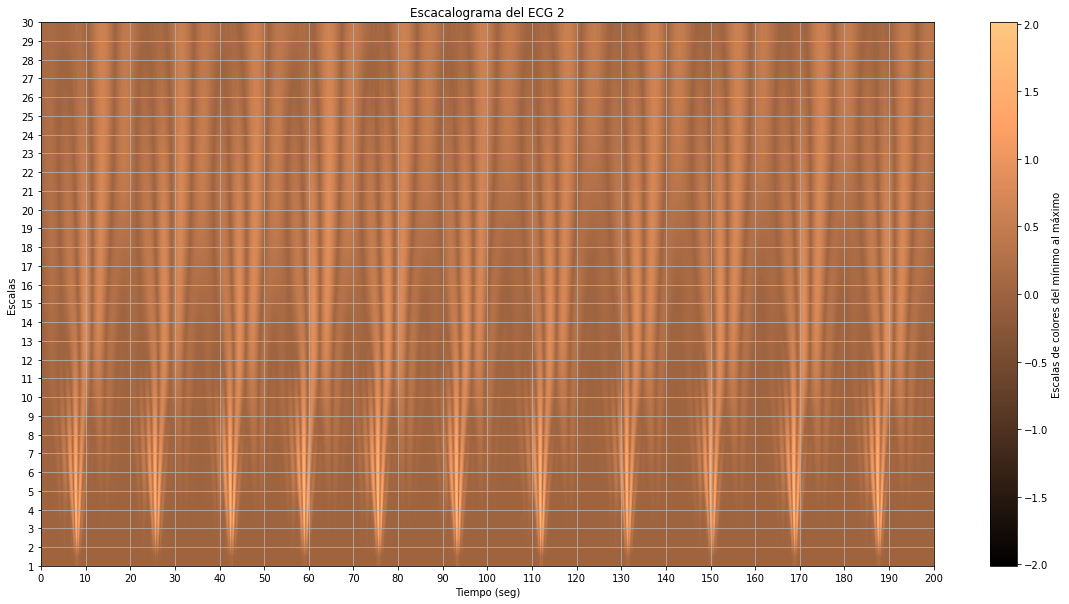

In [ ]:
t = a
señal = mv
escalas = np.arange(1,31)
coef, freqs = pywt.cwt(señal, escalas, 'gaus4')

plt.figure(figsize=(20,10))
plt.imshow(abs(coef), extent=[0,200,30,1], interpolation='bilinear', cmap='copper', aspect='auto', vmax=abs(coef).max(), vmin=-abs(coef).max())
plt.gca().invert_yaxis()
plt.yticks(np.arange(1,31,1))
plt.xticks(np.arange(0,201,10))
plt.colorbar(label='Escalas de colores del mínimo al máximo')
plt.title('Escalograma del ECG 2', fontsize=12)
plt.xlabel('Tiempo (seg)')
plt.ylabel('Escalas')
plt.grid()
plt.show()

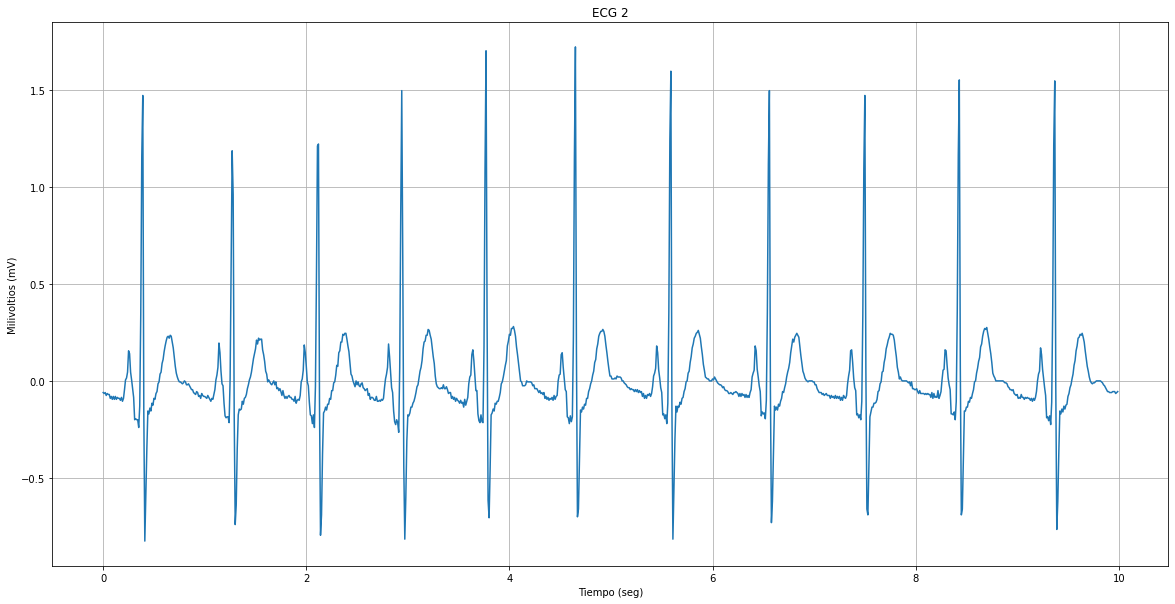

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(t,señal)
plt.title('ECG 2', fontsize=12)
plt.xlabel('Tiempo (seg)')
plt.ylabel('Milivoltios (mV)')
plt.grid()
plt.show()

### **Ejemplo Matemático.**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


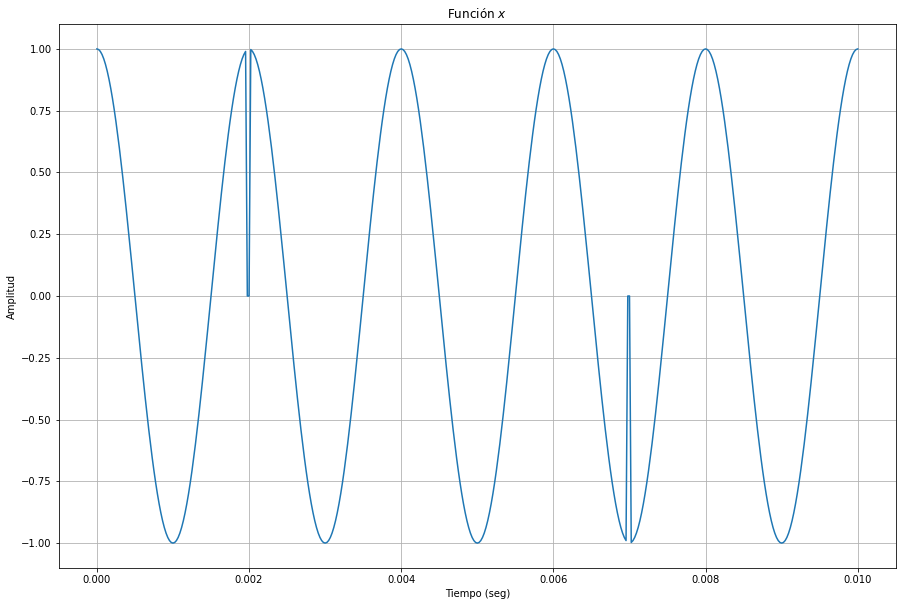

In [ ]:
Fs = 44100.0
tclip = 10e-3
nos = np.int(Fs*tclip)
tpoints = np.linspace(0,10e-3,nos)
x = np.cos(2*np.pi*500*tpoints)

x[87:89] = 0
x[307:309] = 0

plt.figure(figsize=(15,10))
plt.plot(tpoints,x)
plt.title('Función $x$')
plt.ylabel('Amplitud')
plt.xlabel('Tiempo (seg)')
plt.grid()
plt.show()

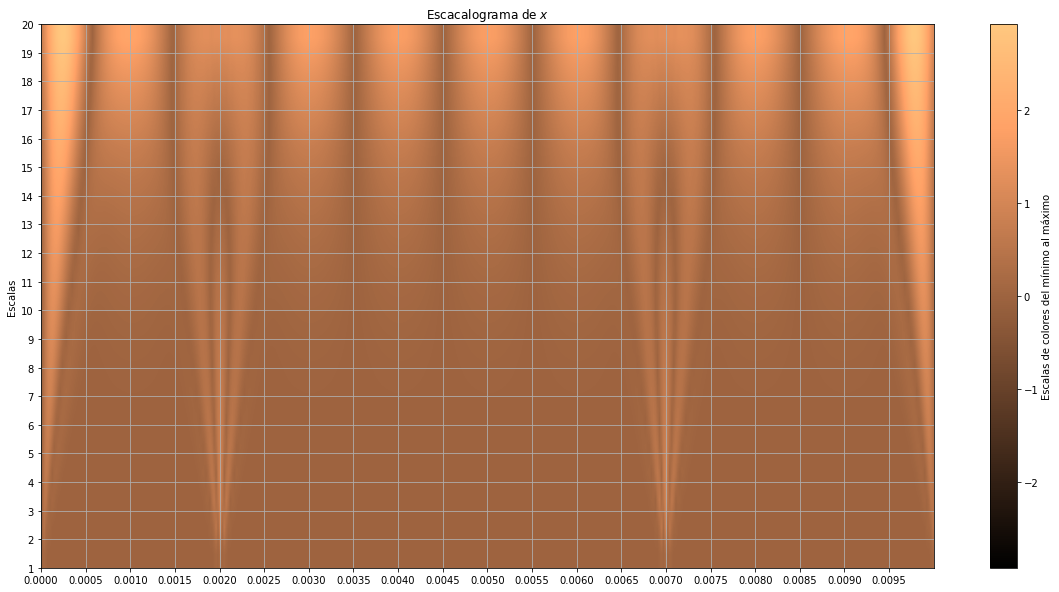

In [ ]:
scales = np.arange(1,21,1)
coef, freqs = pywt.cwt(x, scales, 'gaus4')

plt.figure(figsize=(20,10))
plt.imshow(abs(coef), extent=[0,10e-3,20,1], interpolation='bilinear', cmap='copper', aspect='auto', vmax=abs(coef).max(), vmin=-abs(coef).max())
plt.gca().invert_yaxis()
plt.xticks(np.arange(0,nos/Fs,nos/(20*Fs)))
plt.yticks(np.arange(1,21,1))
plt.colorbar(label='Escalas de colores del mínimo al máximo')
plt.title('Escacalograma de $x$', fontsize=12)
plt.ylabel('Escalas')
plt.grid()
plt.show()

Bibliografía.

- Exploring Technologies (Marzo 4, 2022) Continuous Wavelet Transform (CWT) OF 1-D Signals using Python and MATLAB [vídeo] YouTube. URL: https://www.youtube.com/watch?v=qoMDpSatG7M&ab_channel=ExploringTechnologies [Visto: Abril 24, 2022].
- Victor Sanz (Julio 10, 2020) MAPA DE CALOR en Python con Seborn [vídeo] YouTube. URL: https://www.youtube.com/watch?v=ii1xcd3lZ_4&ab_channel=VictorSanz [Visto: Abril 23, 2022].
